<a href="https://colab.research.google.com/github/RinHere/DATA_INTERN/blob/main/TIMA_TASK6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print("Đã tải thành công:", file_name)
print("Số dòng:", df.shape[0], "| Số cột:", df.shape[1])
df.head()


Saving Tima_CRM_with_ThoiGianVay_Thang.csv to Tima_CRM_with_ThoiGianVay_Thang.csv
Đã tải thành công: Tima_CRM_with_ThoiGianVay_Thang.csv
Số dòng: 2381 | Số cột: 51


,stt,sotiendkvaybandau,tiengiaingan,sotienconlai,application_date,ts_credit_score_v2,số_diện_thoại_khách_hàng,fromdate,id,loanid,...,creditinfo,name,address,checktime,brieft,numberofloans,hasbaddebt,haslatepayment,ThoiGianVay,ThoiGianVay_Thang
0,3.0,10000000.0,250000.0,9750000.0,2016-07-28,403,977966899,2016-07-28,226,38665,...,"khách hàng hiện không có quan hệ tại tctd, khô...",NGUYỄN THỊ THANH,"288 TỔ 36 NGÕ 405,.,NGỌC THỤY,NGỌC THỤY,LONG B...",2019-03-17 11:22:15,notfound,1.0,0,0,0.7,8.0
1,4.0,5000000.0,5000000.0,0.0,2016-06-29,531,397511119,2016-06-29,45,38665,...,"khách hàng hiện không có quan hệ tại tctd, khô...",DAO CONG QUYET,"P203-E9 PHUONG MAI,DONG DA,HA NOI",2019-03-17 08:29:24,0,0.0,0,0,0.4,5.5
2,6.0,10000000.0,10000000.0,0.0,2016-08-05,675,966710180,2016-08-05,293,38665,...,"khách hàng hiện không có quan hệ tại tctd, khô...",ĐÀO NGỌC LINH,"-, TT CỤC KHÍ TƯỢNG THỦY VĂN, TRUNG LIỆT, Q.ĐỐ...",2019-03-17 14:14:22,0,0.0,0,0,0.3,4.0
3,7.0,10000000.0,10000000.0,0.0,2016-06-29,675,966710180,2016-06-29,66,38665,...,"khách hàng hiện không có quan hệ tại tctd, khô...",ĐÀO NGỌC LINH,"-, TT CỤC KHÍ TƯỢNG THỦY VĂN, TRUNG LIỆT, Q.ĐỐ...",2019-03-17 14:14:22,0,0.0,0,0,0.1,1.0
4,8.0,7000000.0,7000000.0,0.0,2016-07-07,582,963609962,2016-07-07,102,38665,...,"khách hàng hiện không có quan hệ tại tctd, khô...",DO MINH TRANG,227 NGO CHO KHAM THIEN DONG DA HA NOI VN,2019-03-17 12:21:17,0,0.0,0,0,0.7,8.0


In [ ]:
import re
import unicodedata
import pandas as pd

def strip_accents(s: str) -> str:
    if not isinstance(s, str):
        s = str(s)
    s = unicodedata.normalize('NFD', s)
    s = ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')
    return s

def normalize_colname(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)      # thay mọi ký tự lạ bằng "_"
    s = re.sub(r"_+", "_", s).strip("_")   # gọn dấu "_"
    return s

orig_cols = df.columns.tolist()
norm_map = {c: normalize_colname(c) for c in orig_cols}

alias_to_canonical = {
    "tiengiaingan": "TienGiaiNgan",
    "tien_giai_ngan": "TienGiaiNgan",
    "disbursedamount": "TienGiaiNgan",
    "amountdisbursed": "TienGiaiNgan",
    "tien_gn": "TienGiaiNgan",

    "sotiendkvaybandau": "SoTienDKVayBanDau",
    "so_tien_dk_vay_ban_dau": "SoTienDKVayBanDau",
    "initialloanamount": "SoTienDKVayBanDau",
    "requestedamount": "SoTienDKVayBanDau",

    "trangthai": "Trạng thái",
    "trang_thai": "Trạng thái",
    "status": "Trạng thái",
    "loanstatus": "Trạng thái",

    "ts_credit_score_v2": "TS_CREDIT_SCORE_V2",


    "salary": "Salary",

    "jobname": "JobName",

    "cityname": "CityName",
    "districtname": "DistrictName",

    "hinh_thuc_cu_tru": "Hình thức cư trú",
    "hinhthuccutru": "Hình thức cư trú",

    "gender": "Gender",

    "birthday": "Birthday",
}

rename_dict = {}
for orig, normed in norm_map.items():
    if normed in alias_to_canonical:
        rename_dict[orig] = alias_to_canonical[normed]

if rename_dict:
    df.rename(columns=rename_dict, inplace=True)

print(" Đã chuẩn hoá & đổi tên một số cột:")
for k, v in rename_dict.items():
    print(f"- {k}  ->  {v}")

print("\n Danh sách cột sau chuẩn hoá/đổi tên:")
print(df.columns.tolist())


 Đã chuẩn hoá & đổi tên một số cột:
- sotiendkvaybandau  ->  SoTienDKVayBanDau
- tiengiaingan  ->  TienGiaiNgan
- ts_credit_score_v2  ->  TS_CREDIT_SCORE_V2
- tiền_giải_ngân  ->  TienGiaiNgan
- trạng_thái  ->  Trạng thái
- gender  ->  Gender
- birthday  ->  Birthday
- cityname  ->  CityName
- districtname  ->  DistrictName
- hình_thức_cư_trú  ->  Hình thức cư trú
- jobname  ->  JobName
- salary  ->  Salary

 Danh sách cột sau chuẩn hoá/đổi tên:
['stt', 'SoTienDKVayBanDau', 'TienGiaiNgan', 'sotienconlai', 'application_date', 'TS_CREDIT_SCORE_V2', 'số_diện_thoại_khách_hàng', 'fromdate', 'id', 'loanid', 'số_tiền_dăng_ký_vay_ban_dầu', 'TienGiaiNgan', 'tiền_gốc_còn_lại', 'todate', 'Trạng thái', 'fullname', 'cardnumber', 'Gender', 'Birthday', 'CityName', 'DistrictName', 'wardname', 'Hình thức cư trú', 'thời_gian_dã_sống', 'street', 'citynamehousehold', 'districtnamehousehold', 'wardnamehousehold', 'JobName', 'namecompany', 'addresscompany', 'citycompany', 'districtnamecompany', 'Salary', 're

Dùng cột: 'TienGiaiNgan' (tỷ lệ số hợp lệ ≈ 100.0%)


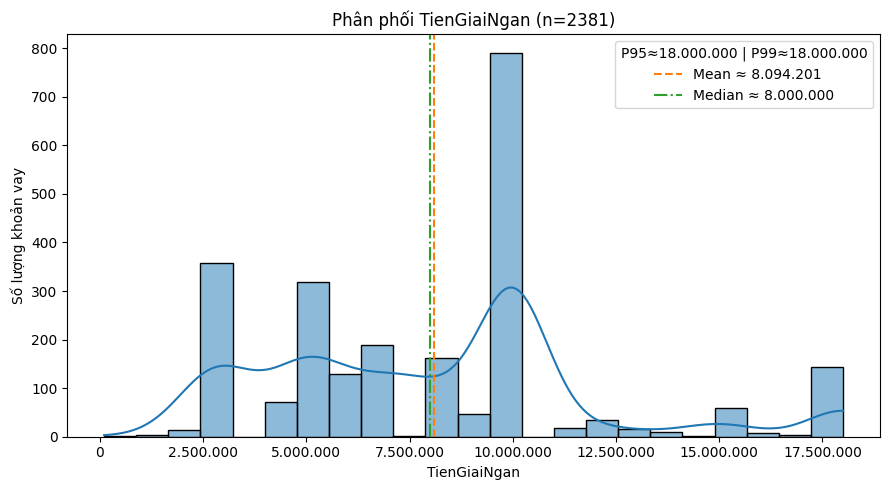

 Thống kê nhanh:
- Count : 2381
- Mean  : 8.094.200.76
- Median: 8.000.000.00
- P95   : 18.000.000.00
- P99   : 18.000.000.00


In [ ]:
#ĐƠN BIẾN
import re, unicodedata, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from matplotlib.ticker import FuncFormatter

def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def normalize_colname(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

normalized = [normalize_colname(c) for c in df.columns]
target_keys = {"tiengiaingan","tien_giai_ngan","disbursedamount","amountdisbursed","tien_gn"}
candidate_idx = [i for i, key in enumerate(normalized) if key in target_keys]

if not candidate_idx:
    print(" Không tìm thấy cột tương ứng với 'TienGiaiNgan'. In thử cột để kiểm tra:")
    print(df.columns.tolist()[:30])
else:
    best_i, best_score, best_series = None, -1, None
    for i in candidate_idx:
        ser = df.iloc[:, i]
        conv = pd.to_numeric(ser.astype(str).str.replace(r"[,\s]", "", regex=True), errors="coerce")
        score = conv.notna().mean()
        if score > best_score:
            best_i, best_score, best_series = i, score, conv

    chosen_name = df.columns[best_i]
    s = best_series.dropna()
    if s.empty:
        print(f" Cột '{chosen_name}' không có giá trị số hợp lệ để vẽ.")
    else:
        print(f"Dùng cột: '{chosen_name}' (tỷ lệ số hợp lệ ≈ {best_score:.1%})")
        n = len(s)
        mean_val, median_val = s.mean(), s.median()
        p95, p99 = s.quantile(0.95), s.quantile(0.99)

        def thousands(x, _):
            try: return f"{int(x):,}".replace(",", ".")
            except: return x

        iqr = np.subtract(*np.percentile(s, [75, 25]))
        bin_width = 2 * iqr * (n ** (-1/3)) if iqr > 0 else None
        bins = int(np.clip((s.max() - s.min()) / bin_width, 10, 80)) if bin_width else 40

        plt.figure(figsize=(9,5))
        sns.histplot(s, bins=bins, kde=True)
        plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands))
        plt.title(f"Phân phối {chosen_name} (n={n})")
        plt.xlabel(chosen_name); plt.ylabel("Số lượng khoản vay")
        plt.axvline(mean_val, color="tab:orange", linestyle="--", linewidth=1.5, label=f"Mean ≈ {mean_val:,.0f}".replace(",", "."))
        plt.axvline(median_val, color="tab:green", linestyle="-.", linewidth=1.5, label=f"Median ≈ {median_val:,.0f}".replace(",", "."))
        plt.legend(title=f"P95≈{p95:,.0f} | P99≈{p99:,.0f}".replace(",", "."), loc="upper right")
        plt.tight_layout(); plt.show()

        print(" Thống kê nhanh:")
        print(f"- Count : {n}")
        print(f"- Mean  : {mean_val:,.2f}".replace(",", "."))
        print(f"- Median: {median_val:,.2f}".replace(",", "."))
        print(f"- P95   : {p95:,.2f}".replace(",", "."))
        print(f"- P99   : {p99:,.2f}".replace(",", "."))


NHẬN XÉT:
- Cột sử dụng: TienGiaiNgan
*  Hình dạng: Lệch phải nhẹ, có nhiều cụm giá trị rõ rệt (khoảng 2.5 triệu – 10 triệu đồng) và một vài điểm cao ở vùng 18 triệu.
*  Trung tâm phân phối: Mean ≈ 8.094.200, Median ≈ 8.000.000 → rất gần nhau, cho thấy phân phối khá cân bằng quanh 8 triệu đồng.
*   Ngưỡng cao: P95 ≈ 18.000.000, P99 ≈ 18.000.000 → chỉ khoảng 1–5% khoản vay có giá trị trên 18 triệu đồng.
*   Outlier/Độ phân tán: Có một vài giá trị lớn (≥18 triệu) nhưng chiếm tỷ trọng nhỏ, không gây lệch mạnh toàn bộ phân phối.


Ý nghĩa kinh doanh:
*   Phần lớn khách hàng vay trong khoảng 5–10 triệu đồng, đây là phân khúc chính của danh mục tín dụng TIMA.
*   Một nhóm nhỏ (~5%) vay trên 18 triệu có thể là các khoản vay cầm cố tài sản lớn hơn – cần được kiểm soát rủi ro kỹ hơn trong quá trình thẩm định.
*   Phân khúc 8 triệu (median) là điển hình, nên TIMA có thể tập trung tối ưu quy trình và marketing cho nhóm này để tăng hiệu suất giải ngân.

 Dùng cột: 'TienGiaiNgan' (tỷ lệ số hợp lệ ≈ 100.0%)


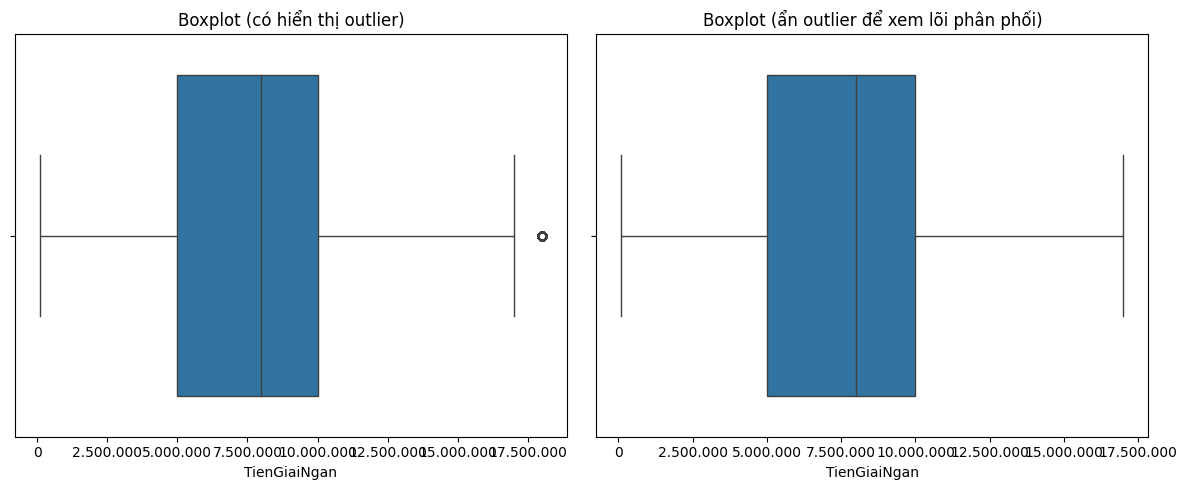

 Thống kê Boxplot:
- n      : 2381
- Q1     : 5.000.000
- Median : 8.000.000
- Q3     : 10.000.000
- IQR    : 5.000.000
- Lower whisker (Q1-1.5*IQR): -2.500.000
- Upper whisker (Q3+1.5*IQR): 17.500.000
- P95    : 18.000.000
- P99    : 18.000.000
- Số lượng outlier: 143 (6.01%)

Top 10 giá trị lớn nhất:
      TienGiaiNgan  rank
2372    18000000.0     1
2371    18000000.0     2
2348    18000000.0     3
2369    18000000.0     4
2365    18000000.0     5
1076    18000000.0     6
1075    18000000.0     7
1074    18000000.0     8
1060    18000000.0     9
2329    18000000.0    10


In [ ]:
import re, unicodedata, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from matplotlib.ticker import FuncFormatter

def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def normalize_colname(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

normalized = [normalize_colname(c) for c in df.columns]
target_keys = {"tiengiaingan","tien_giai_ngan","disbursedamount","amountdisbursed","tien_gn"}
candidate_idx = [i for i, key in enumerate(normalized) if key in target_keys]

if not candidate_idx:
    raise ValueError("Không tìm thấy cột tương ứng với 'TienGiaiNgan'. Hãy chạy cell chuẩn hoá cột trước.")

best_i, best_score, s = None, -1, None
for i in candidate_idx:
    ser = df.iloc[:, i]
    conv = pd.to_numeric(ser.astype(str).str.replace(r"[,\s]", "", regex=True), errors="coerce")
    score = conv.notna().mean()
    if score > best_score:
        best_i, best_score, s = i, score, conv.dropna()

col_name = df.columns[best_i]
print(f" Dùng cột: '{col_name}' (tỷ lệ số hợp lệ ≈ {best_score:.1%})")

if s.empty:
    raise ValueError(f"Cột '{col_name}' không có giá trị số hợp lệ để vẽ.")

q1, q2, q3 = s.quantile(0.25), s.quantile(0.5), s.quantile(0.75)
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
outliers = s[(s < lower_whisker) | (s > upper_whisker)]
p95, p99 = s.quantile(0.95), s.quantile(0.99)

def thousands(x, _):
    try: return f"{int(x):,}".replace(",", ".")
    except: return x

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.boxplot(x=s, ax=axes[0], showfliers=True)
axes[0].xaxis.set_major_formatter(FuncFormatter(thousands))
axes[0].set_title("Boxplot (có hiển thị outlier)")
axes[0].set_xlabel(col_name)

sns.boxplot(x=s, ax=axes[1], showfliers=False)
axes[1].xaxis.set_major_formatter(FuncFormatter(thousands))
axes[1].set_title("Boxplot (ẩn outlier để xem lõi phân phối)")
axes[1].set_xlabel(col_name)

plt.tight_layout()
plt.show()

print(" Thống kê Boxplot:")
print(f"- n      : {len(s)}")
print(f"- Q1     : {q1:,.0f}".replace(",", "."))
print(f"- Median : {q2:,.0f}".replace(",", "."))
print(f"- Q3     : {q3:,.0f}".replace(",", "."))
print(f"- IQR    : {iqr:,.0f}".replace(",", "."))
print(f"- Lower whisker (Q1-1.5*IQR): {lower_whisker:,.0f}".replace(",", "."))
print(f"- Upper whisker (Q3+1.5*IQR): {upper_whisker:,.0f}".replace(",", "."))
print(f"- P95    : {p95:,.0f}".replace(",", "."))
print(f"- P99    : {p99:,.0f}".replace(",", "."))
print(f"- Số lượng outlier: {outliers.shape[0]} ({outliers.shape[0]/len(s):.2%})")

top_out = s.sort_values(ascending=False).head(10)
print("\nTop 10 giá trị lớn nhất:")
print(top_out.to_frame(name=col_name).assign(rank=lambda x: range(1, len(x)+1)))


***Nhận xét – Boxplot TienGiaiNgan***


Cột sử dụng: TienGiaiNgan

Thống kê chính:

- Q1 = 5.000.000
- Median = 8.000.000
- Q3 = 10.000.000
- IQR = 5.000.000
- Lower whisker = -2.500.000 (do Q1 - 1.5*IQR, nhưng thực tế không có khoản âm → cắt về 0)
- Upper whisker = 17.500.000
- P95 = 18.000.000, P99 = 18.000.000
- Outlier: 143 khoản vay (≈6,0%) vượt quá 17,5 triệu đồng.
***Quan sát từ boxplot:***

- Phần lõi dữ liệu (từ 5–10 triệu) chiếm khoảng 50% danh mục → tập trung rất rõ quanh mức 8 triệu đồng.
- Có một số điểm ngoài (outlier) ở mức ~18 triệu đồng, trùng với ngưỡng P95–P99, cho thấy có ít khoản vay giá trị cao bất thường.
***Ý nghĩa kinh doanh:***

- Phân khúc vay nhỏ–trung bình (5–10 triệu) là phổ biến nhất và đại diện cho phần lớn khách hàng TIMA.
- Các khoản vay lớn hơn 17,5 triệu (≈6%) là nhóm có thể mang lại doanh thu cao hơn nhưng cũng tiềm ẩn rủi ro tín dụng cao → nên kiểm soát kỹ ở khâu thẩm định và định giá tài sản.
- Khoản median 8 triệu là mức điển hình → có thể dùng làm chuẩn để thiết kế gói vay tiêu chuẩn, tối ưu quy trình và tốc độ giải ngân.



 Dùng cột: 'SoTienDKVayBanDau' (tỷ lệ số hợp lệ ≈ 100.0%)


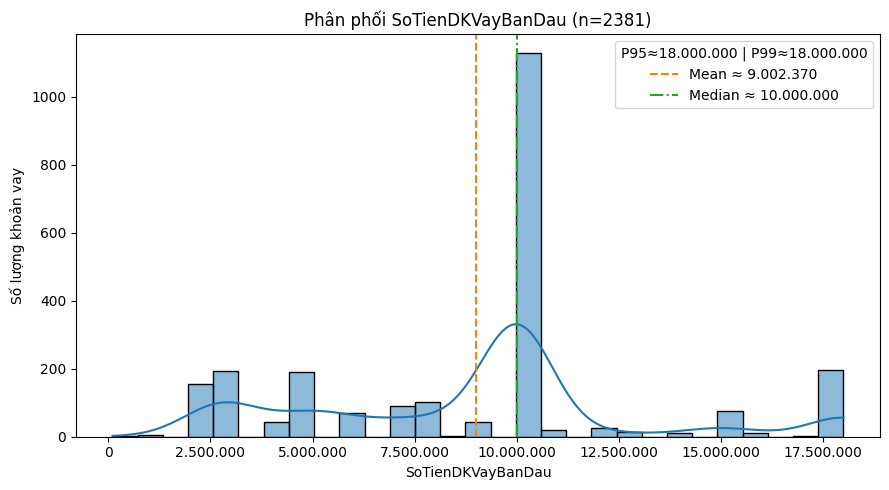

 Thống kê nhanh:
- Count : 2381
- Mean  : 9.002.369.59
- Median: 10.000.000.00
- P95   : 18.000.000.00
- P99   : 18.000.000.00


In [ ]:
import re, unicodedata, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from matplotlib.ticker import FuncFormatter

def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def normalize_colname(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

normalized = [normalize_colname(c) for c in df.columns]
target_keys = {
    "sotiendkvaybandau", "so_tien_dk_vay_ban_dau",
    "so_tien_dang_ky_vay_ban_dau", "requestedamount",
    "initialloanamount", "requested_amount", "initial_loan_amount",
    "so_tien_vay_ban_dau", "so_tien_dang_ky"
}
candidate_idx = [i for i, key in enumerate(normalized) if key in target_keys]

if not candidate_idx:
    raise ValueError("Không tìm thấy cột tương ứng với 'SoTienDKVayBanDau'. Kiểm tra lại tên cột trong df.columns.")

best_i, best_score, s = None, -1, None
for i in candidate_idx:
    ser = df.iloc[:, i]
    conv = pd.to_numeric(ser.astype(str).str.replace(r"[,\s]", "", regex=True), errors="coerce")
    score = conv.notna().mean()
    if score > best_score:
        best_i, best_score, s = i, score, conv.dropna()

col_name = df.columns[best_i]
print(f" Dùng cột: '{col_name}' (tỷ lệ số hợp lệ ≈ {best_score:.1%})")

if s.empty:
    raise ValueError(f"Cột '{col_name}' không có giá trị số hợp lệ để vẽ.")

n = len(s)
mean_val, median_val = s.mean(), s.median()
p95, p99 = s.quantile(0.95), s.quantile(0.99)

def thousands(x, _):
    try: return f"{int(x):,}".replace(",", ".")
    except: return x

iqr = np.subtract(*np.percentile(s, [75, 25]))
bin_width = 2 * iqr * (n ** (-1/3)) if iqr > 0 else None
bins = int(np.clip((s.max() - s.min()) / bin_width, 10, 80)) if bin_width else 40

plt.figure(figsize=(9,5))
sns.histplot(s, bins=bins, kde=True)
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands))
plt.title(f"Phân phối {col_name} (n={n})")
plt.xlabel(col_name); plt.ylabel("Số lượng khoản vay")
plt.axvline(mean_val, color="tab:orange", linestyle="--", linewidth=1.5, label=f"Mean ≈ {mean_val:,.0f}".replace(",", "."))
plt.axvline(median_val, color="tab:green", linestyle="-.", linewidth=1.5, label=f"Median ≈ {median_val:,.0f}".replace(",", "."))
plt.legend(title=f"P95≈{p95:,.0f} | P99≈{p99:,.0f}".replace(",", "."), loc="upper right")
plt.tight_layout(); plt.show()

print(" Thống kê nhanh:")
print(f"- Count : {n}")
print(f"- Mean  : {mean_val:,.2f}".replace(",", "."))
print(f"- Median: {median_val:,.2f}".replace(",", "."))
print(f"- P95   : {p95:,.2f}".replace(",", "."))
print(f"- P99   : {p99:,.2f}".replace(",", "."))



 Dùng cột trạng thái: 'Trạng thái' (non-null ≈ 100.0%)

 Phân phối trạng thái (tính trên toàn bộ tập):


/tmp/ipython-input-2219229836.py:36: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  npl_flag = status_norm.str.contains(npl_pattern, regex=True)


,Count,Percent_%
Trạng thái,,
Kết thúc,1585,66.57
Đang Vay,590,24.78
Nợ Xấu,206,8.65



📌 Tỷ lệ NPL ước tính (nhận diện theo từ khóa): 8.65%


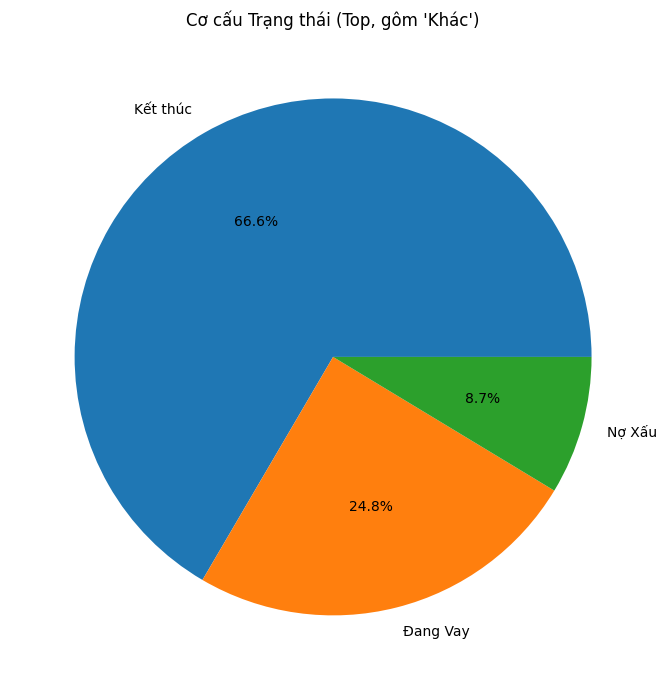

In [ ]:
import re, unicodedata, numpy as np, pandas as pd
import matplotlib.pyplot as plt

def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def norm_col(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

aliases = {"trang_thai","trangthai","status","loanstatus","tinh_trang","tinhtrang"}
norm_names = [norm_col(c) for c in df.columns]
cand_idx = [i for i, nm in enumerate(norm_names) if nm in aliases]

if not cand_idx:
    raise ValueError("Không tìm thấy cột tương ứng với 'Trạng thái' (trangthai/status/loanstatus/...). Kiểm tra df.columns.")

best_i, best_score = None, -1
for i in cand_idx:
    ser = df.iloc[:, i]
    score = ser.notna().mean()
    if score > best_score:
        best_i, best_score = i, score

col_status = df.columns[best_i]
print(f" Dùng cột trạng thái: '{col_status}' (non-null ≈ {best_score:.1%})")

status_raw = df[col_status].astype(str).str.strip()
status_norm = status_raw.apply(lambda x: norm_col(x))

npl_pattern = re.compile(r"(no_xau|no_xau_|no_xau$|no_xau\W|no\s*xau|bad|default|delinquent|npl)")

npl_flag = status_norm.str.contains(npl_pattern, regex=True)
npl_rate = npl_flag.mean()

vc = status_raw.replace({"nan":"NaN"})
vc_counts = vc.value_counts(dropna=False)
vc_perc = (vc_counts / len(df)).rename("Percent")
dist = pd.concat([vc_counts.rename("Count"), (vc_counts/len(df)*100).round(2).rename("Percent_%")], axis=1)

print("\n Phân phối trạng thái (tính trên toàn bộ tập):")
display(dist)

print(f"\n📌 Tỷ lệ NPL ước tính (nhận diện theo từ khóa): {npl_rate:.2%}")

topk = 8
vc_top = vc_counts.head(topk)
others = vc_counts.iloc[topk:].sum()
if others > 0:
    vc_top = vc_top.append(pd.Series({"Khác": others}))

plt.figure(figsize=(7,7))
vc_top.plot(kind="pie", autopct="%.1f%%", ylabel="", title="Cơ cấu Trạng thái (Top, gôm 'Khác')")
plt.tight_layout()
plt.show()


-  Pie chart Trạng thái
* Cột sử dụng: Trạng thái

***Phân phối:***

- Trạng thái	Số lượng	Tỷ lệ (%)
- Kết thúc	1.585	66.6%
- Đang vay	590	24.8%
- Nợ xấu	206	8.7%
- Tỷ lệ NPL (nợ xấu) tổng thể: 8.65%

***Quan sát:***

- Phần lớn các khoản vay đã kết thúc (≈ 2/3 danh mục), cho thấy danh mục có mức quay vòng vốn cao.
- Khoảng 1/4 khoản vay đang còn hiệu lực, phản ánh nhóm khách hàng hiện tại đang duy trì nghĩa vụ trả nợ.
- 8.7 % khoản vay rơi vào trạng thái “Nợ xấu”, đây là một tỷ lệ đáng chú ý cần được kiểm soát chặt chẽ.
***Ý nghĩa kinh doanh:***

- Tỷ lệ NPL ~ 8.6 % nằm ở mức trung bình–cao so với thị trường cho vay tiêu dùng; đây là chỉ báo rủi ro tín dụng quan trọng.
- TIMA nên tiếp tục theo dõi các khoản “Đang vay” để dự báo nguy cơ chuyển nhóm nợ xấu, đồng thời phân tích đặc điểm khách hàng trong nhóm này ở các bước EDA kế tiếp.
- Việc giữ tỷ lệ nợ xấu < 10 % là mục tiêu cần ưu tiên để đảm bảo hiệu quả tài chính và uy tín thương hiệu.

 Dùng cột sản phẩm: 'productcreditname' (non-null ≈ 100.0%)

 Top 10 sản phẩm theo số lượng khoản vay:


,Count,Percent
productcreditname,,
cầm cố điện thoại,1109,46.58
cầm cố xe máy,507,21.29
vay theo sim,298,12.52
cầm cố điện thoại hk,250,10.50
cầm cố xe máy kcc,160,6.72
đăng ký xe ô tô,40,1.68
ô tô ngân hàng,8,0.34
vay trực tuyến qua sim,5,0.21
cầm sim số đẹp,3,0.13


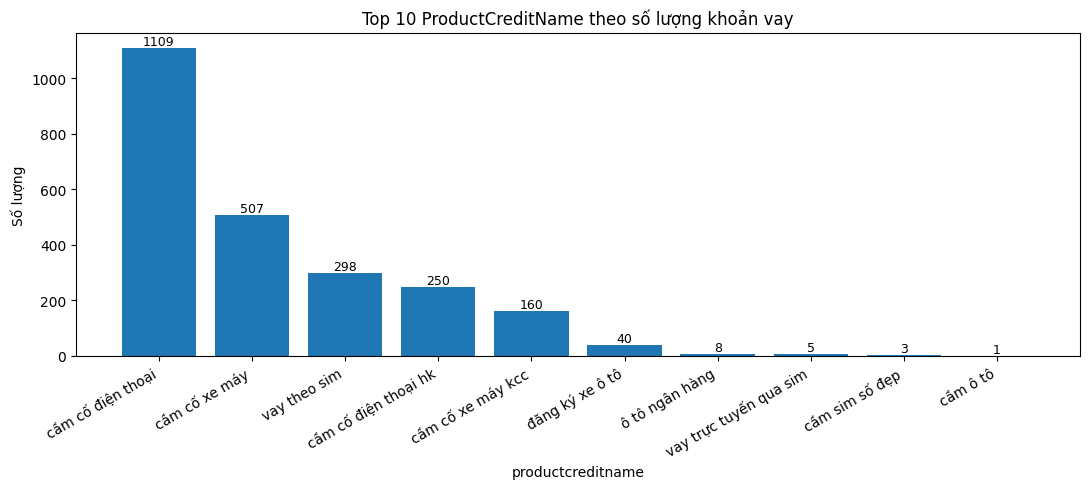

In [ ]:
import re, unicodedata, pandas as pd
import matplotlib.pyplot as plt

def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def norm_col(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

aliases = {"productcreditname","product_credit_name","ten_san_pham","san_pham_tin_dung","product"}
norm_names = [norm_col(c) for c in df.columns]
cand_idx = [i for i, nm in enumerate(norm_names) if nm in aliases]

if not cand_idx:
    raise ValueError("Không tìm thấy cột tương ứng với 'ProductCreditName' (productcreditname/ten_san_pham/...). Kiểm tra df.columns.")

best_i, best_score = None, -1
for i in cand_idx:
    ser = df.iloc[:, i]
    score = ser.notna().mean()
    if score > best_score:
        best_i, best_score = i, score

col_prod = df.columns[best_i]
print(f" Dùng cột sản phẩm: '{col_prod}' (non-null ≈ {best_score:.1%})")

series = df[col_prod].fillna("NaN")
vc = series.value_counts()
topk = 10
top_tbl = (
    vc.head(topk)
      .to_frame("Count")
      .assign(Percent=lambda x: (x["Count"]/len(series)*100).round(2))
)

print("\n Top 10 sản phẩm theo số lượng khoản vay:")
display(top_tbl)

plt.figure(figsize=(11,5))
bars = plt.bar(top_tbl.index.astype(str), top_tbl["Count"])
plt.title("Top 10 ProductCreditName theo số lượng khoản vay")
plt.xlabel(col_prod); plt.ylabel("Số lượng")
plt.xticks(rotation=30, ha="right")

for b in bars:
    h = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, h, f"{int(h)}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


Nhận xét – Bar chart ProductCreditName (Top 10 sản phẩm theo số lượng khoản vay)
- Cột sử dụng: ProductCreditName

***Phân phối Top 10 sản phẩm:***
- Sản phẩm	Số lượng	Tỷ lệ (%)
- Cầm cố điện thoại	1.109	46.6%
- Cầm cố xe máy	507	21.3%
- Vay theo sim	298	12.5%
- Cầm cố điện thoại HK	250	10.5%
- Cầm cố xe máy KCC	160	6.7%
- Đăng ký xe ô tô	40	1.68%
- Ô tô ngân hàng	8	0.34%
- Vay trực tuyến qua sim	5	0.21%
- Cầm sim số đẹp	3	0.13%
- Cầm ô tô	1	0.04%

***Quan sát:***

- Hai sản phẩm “Cầm cố điện thoại” (46.6%) và “Cầm cố xe máy” (21.3%) chiếm gần 68% tổng số khoản vay, thể hiện mức độ tập trung rất cao vào nhóm vay cầm cố tài sản tiêu dùng nhỏ.
- Các sản phẩm khác như “Vay theo sim”, “Cầm cố điện thoại HK”, và “Cầm cố xe máy KCC” chiếm tỷ trọng nhỏ hơn (5–12%), trong khi nhóm sản phẩm về ô tô gần như không đáng kể (<2%).
- Phân phối mang dạng “long-tail” – một vài sản phẩm chủ lực chiếm phần lớn doanh số, còn lại là nhóm phụ.

***Ý nghĩa kinh doanh:***

- TIMA hiện phụ thuộc mạnh vào 2 sản phẩm chủ lực là “Cầm cố điện thoại” và “Cầm cố xe máy”.
- Ưu điểm: dễ mở rộng, giải ngân nhanh, rủi ro thấp.
- Rủi ro: danh mục thiếu đa dạng, dễ bị ảnh hưởng nếu nhu cầu ở phân khúc này giảm.
- Nên xem xét mở rộng hoặc đẩy mạnh nhóm sản phẩm “vay theo sim” – vốn chiếm 12.5%, có tiềm năng phát triển nhưng cần cải thiện marketing và quy trình.
- Các sản phẩm như “Ô tô ngân hàng”, “Cầm ô tô” cần được đánh giá lại tính khả thi vì nhu cầu rất thấp.


 Dùng cột địa lý: 'CityName' (non-null ≈ 100.0%)

 Top 10 tỉnh/thành theo số lượng khoản vay/khách hàng:


,Count,Percent
CityName,,
hà nội,2058,86.43
hồ chí minh,292,12.26
phú thọ,10,0.42
hòa bình,6,0.25
vĩnh phúc,4,0.17
thanh hóa,4,0.17
hải dương,1,0.04
bắc ninh,1,0.04
lào cai,1,0.04


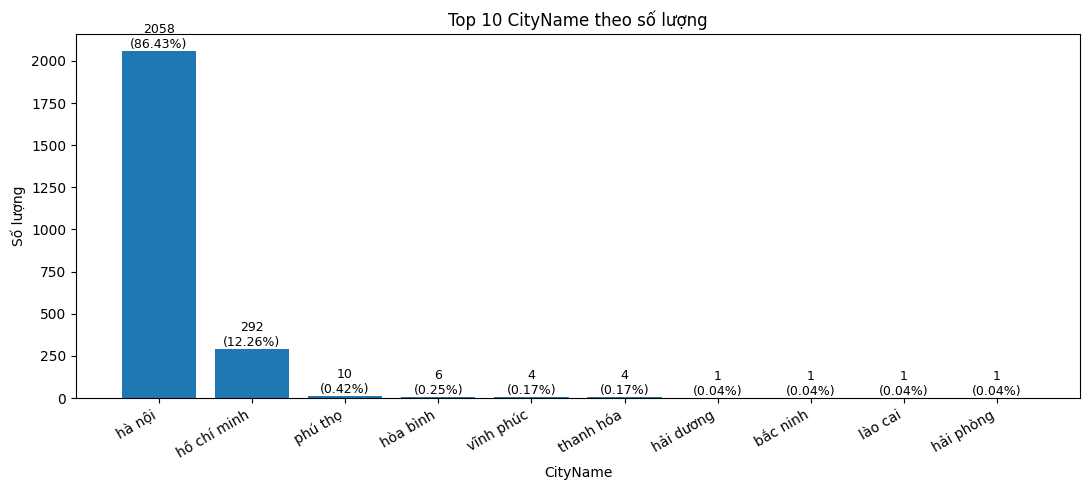

In [ ]:
import re, unicodedata, pandas as pd
import matplotlib.pyplot as plt

def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def norm_col(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

aliases = {"cityname","city","tinh_thanh","tinh","thanh_pho","province","quan_huyen_tinh"}
norm_names = [norm_col(c) for c in df.columns]
cand_idx = [i for i, nm in enumerate(norm_names) if nm in aliases]
if not cand_idx:
    raise ValueError("Không tìm thấy cột tương ứng với 'CityName' (cityname/tinh_thanh/thanh_pho/...). Kiểm tra df.columns.")

best_i, best_score = None, -1
for i in cand_idx:
    ser = df.iloc[:, i]
    score = ser.notna().mean()
    if score > best_score:
        best_i, best_score = i, score

col_city = df.columns[best_i]
print(f" Dùng cột địa lý: '{col_city}' (non-null ≈ {best_score:.1%})")

series = df[col_city].fillna("NaN")
vc = series.value_counts()
topk = 10
top_tbl = (
    vc.head(topk)
      .to_frame("Count")
      .assign(Percent=lambda x: (x["Count"]/len(series)*100).round(2))
)

print("\n Top 10 tỉnh/thành theo số lượng khoản vay/khách hàng:")
display(top_tbl)

plt.figure(figsize=(11,5))
bars = plt.bar(top_tbl.index.astype(str), top_tbl["Count"])
plt.title("Top 10 CityName theo số lượng")
plt.xlabel(col_city); plt.ylabel("Số lượng")
plt.xticks(rotation=30, ha="right")

for i, b in enumerate(bars):
    h = b.get_height()
    pct = top_tbl["Percent"].iloc[i]
    plt.text(b.get_x() + b.get_width()/2, h, f"{int(h)}\n({pct}%)", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


***Nhận xét***

– Bar chart CityName (Top 10 tỉnh/thành theo số lượng khách hàng/khoản vay)

Cột sử dụng: CityName

Phân phối Top 10:

- Thành phố / Tỉnh	Số lượng	Tỷ lệ (%)
-  Hà Nội	2.058	86.43%
-  Hồ Chí Minh	292	12.26%
-  Phú Thọ	10	0.42%
-  Hòa Bình	6	0.25%
-  Vĩnh Phúc	4	0.17%
-  Thanh Hóa	4	0.17%
-  Hải Dương	1	0.04%
-  Bắc Ninh	1	0.04%
-  Lào Cai	1	0.04%
-  Hải Phòng	1	0.04%

***Quan sát:***

- Dữ liệu cho thấy Hà Nội chiếm áp đảo với hơn 86% tổng khách hàng, gấp gần 7 lần so với TP. Hồ Chí Minh (12%).
- Các tỉnh/thành khác chỉ chiếm tổng cộng ~1%, cho thấy dữ liệu hiện nay gần như tập trung tại 2 đô thị lớn.
- Cấu trúc này thể hiện phạm vi hoạt động của TIMA chủ yếu ở khu vực thành thị (Hà Nội và TP.HCM).

***Ý nghĩa kinh doanh:***

- TIMA hiện phụ thuộc mạnh vào thị trường Hà Nội, có thể do mạng lưới đối tác và kênh bán hàng tập trung tại đây.
- Để mở rộng quy mô và giảm rủi ro thị trường, cần:
- Đánh giá khả năng mở rộng chi nhánh hoặc đối tác tín dụng tại TP.HCM.
- Thử nghiệm mô hình vay trực tuyến ở các tỉnh có tiềm năng dân số lớn (Phú Thọ, Hòa Bình, Thanh Hóa…).
- Cấu trúc này cũng ảnh hưởng đến rủi ro danh mục: nếu kinh tế Hà Nội biến động, tỷ lệ nợ xấu của toàn danh mục có thể chịu tác động lớn.

 Dùng cột điểm tín dụng: 'TS_CREDIT_SCORE_V2' (tỷ lệ số hợp lệ ≈ 100.0%)


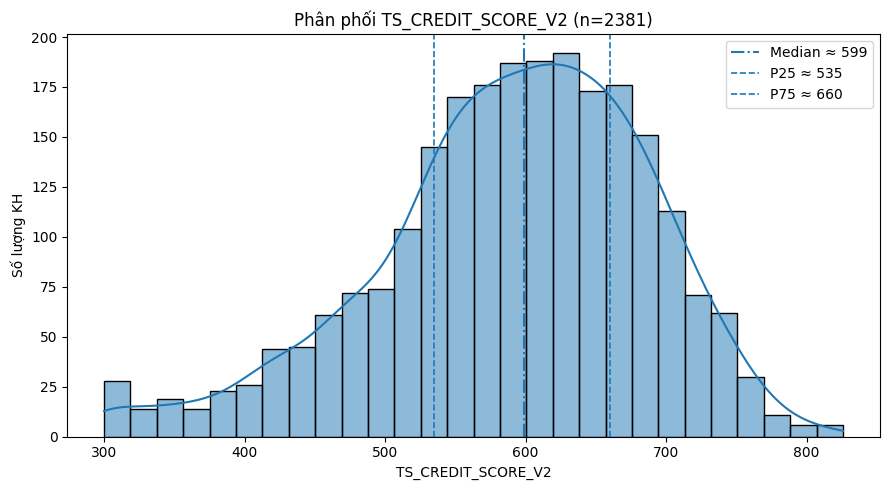

 Thống kê nhanh (TS_CREDIT_SCORE_V2):
- Count  : 2381
- Min    : 300
- P10    : 460
- P25    : 535
- Median : 599
- P75    : 660
- P90    : 704
- Max    : 826
- Mean   : 589.8


In [ ]:
import re, unicodedata, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def norm_col(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

aliases = {"ts_credit_score_v2","ts_credit_score","credit_score","score","tscreditscorev2","ts_creditscore_v2"}
norm_names = [norm_col(c) for c in df.columns]
cand_idx = [i for i, nm in enumerate(norm_names) if nm in aliases]
if not cand_idx:
    raise ValueError("Không tìm thấy cột tương ứng với 'TS_CREDIT_SCORE_V2' (credit_score/score/...). Kiểm tra df.columns.")

best_i, best_score, s = None, -1, None
for i in cand_idx:
    ser = df.iloc[:, i]
    conv = pd.to_numeric(ser, errors="coerce")
    score_ok = conv.notna().mean()
    if score_ok > best_score:
        best_i, best_score, s = i, score_ok, conv.dropna()

col_name = df.columns[best_i]
print(f" Dùng cột điểm tín dụng: '{col_name}' (tỷ lệ số hợp lệ ≈ {best_score:.1%})")

if s.empty:
    raise ValueError(f"Cột '{col_name}' không có giá trị số hợp lệ để vẽ.")

n = len(s)
mean_val, median_val = s.mean(), s.median()
p10, p25, p75, p90 = s.quantile(0.10), s.quantile(0.25), s.quantile(0.75), s.quantile(0.90)
min_v, max_v = s.min(), s.max()

iqr = np.subtract(*np.percentile(s, [75, 25]))
bin_width = 2 * iqr * (n ** (-1/3)) if iqr > 0 else None
bins = int(np.clip((s.max() - s.min()) / bin_width, 10, 80)) if bin_width else 40

plt.figure(figsize=(9,5))
sns.histplot(s, bins=bins, kde=True)
plt.title(f"Phân phối {col_name} (n={n})")
plt.xlabel(col_name); plt.ylabel("Số lượng KH")
plt.axvline(median_val, linestyle="-.", linewidth=1.5, label=f"Median ≈ {median_val:,.0f}")
plt.axvline(p25, linestyle="--", linewidth=1.2, label=f"P25 ≈ {p25:,.0f}")
plt.axvline(p75, linestyle="--", linewidth=1.2, label=f"P75 ≈ {p75:,.0f}")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

print(" Thống kê nhanh (TS_CREDIT_SCORE_V2):")
print(f"- Count  : {n}")
print(f"- Min    : {min_v:,.0f}")
print(f"- P10    : {p10:,.0f}")   # để nhìn đuôi thấp
print(f"- P25    : {p25:,.0f}")
print(f"- Median : {median_val:,.0f}")
print(f"- P75    : {p75:,.0f}")
print(f"- P90    : {p90:,.0f}")   # để nhìn đuôi cao
print(f"- Max    : {max_v:,.0f}")
print(f"- Mean   : {mean_val:,.1f}")

if "NPL_Flag" in df.columns and df["NPL_Flag"].notna().any():
    comp = df.loc[df[col_name].notna()].groupby("NPL_Flag")[col_name].mean()
    if 0 in comp.index and 1 in comp.index:
        print(f"\n Trung bình điểm theo NPL_Flag: Non-NPL ≈ {comp[0]:.1f} | NPL ≈ {comp[1]:.1f} (chênh {comp[0]-comp[1]:.1f})")


#### Nhận xét – Histogram `TS_CREDIT_SCORE_V2`

- **Cột sử dụng:** `TS_CREDIT_SCORE_V2`  
- **Thống kê chính:**
  - Count = **2.381**
  - Min = **300**
  - P10 = **460**
  - P25 = **535**
  - Median = **599**
  - P75 = **660**
  - P90 = **704**
  - Max = **826**
  - Mean ≈ **589.8**

- **Hình dạng phân phối:**  
  Phân phối có dạng **chuông chuẩn (near-normal)**, đỉnh tập trung quanh **600 điểm**. Đuôi phải hơi dài nhẹ (vẫn có khách hàng trên 700 điểm), trong khi đuôi trái mỏng hơn — cho thấy hầu hết khách hàng có điểm trong vùng **500–700**.

- **Trung tâm phân phối:**  
  Median ≈ **599** và Mean ≈ **589**, rất gần nhau → dữ liệu **cân đối**, không bị lệch nặng.  
  Khoảng 50% khách hàng nằm trong vùng **535–660 điểm** (IQR), đại diện cho nhóm rủi ro trung bình.

- **Ngưỡng đáng chú ý:**  
  - **Nhóm <500 điểm (khoảng 10%)** có nguy cơ rủi ro tín dụng cao → cần giám sát kỹ.  
  - **Nhóm >700 điểm (10%)** là nhóm rất tốt, tiềm năng để mở rộng hạn mức hoặc ưu đãi lãi suất.

**Ý nghĩa kinh doanh:**  
- Hệ thống **TS_CREDIT_SCORE_V2 đang phân bổ hợp lý**, phản ánh phân loại khách hàng tương đối chuẩn.  
- TIMA có thể:
  - Sử dụng ngưỡng **600 điểm** làm mốc tham chiếu để **đánh giá rủi ro tín dụng tiêu chuẩn**.  
  - Áp dụng **chính sách ưu đãi hoặc lãi suất thấp hơn** cho nhóm >700 điểm.  
  - Cần **tăng cường kiểm định mô hình** cho nhóm điểm thấp (<500) vì đây là nhóm có khả năng rơi vào nợ xấu cao nhất.


# ***NHÓM 2 ĐA BIẾN***

Dùng cột sản phẩm: 'productcreditname'
Dùng cột trạng thái: 'Trạng thái'

 Tỷ trọng 'Trạng thái' theo ProductCreditName (Top 8, % theo hàng):


/tmp/ipython-input-1697412493.py:35: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  NPL_Flag = status_norm.str.contains(npl_pattern, regex=True).astype(int)


Trạng thái,Kết thúc,Nợ Xấu,Đang Vay
productcreditname,,,
cầm cố điện thoại,65.37,7.66,26.96
cầm cố xe máy,66.67,0.20,33.14
vay theo sim,57.72,33.56,8.72
cầm cố điện thoại hk,80.80,5.20,14.00
cầm cố xe máy kcc,65.62,4.38,30.00
đăng ký xe ô tô,80.00,0.00,20.00



 NPL rate theo sản phẩm (Top 8):


,total,bad,NPL_rate_%
productcreditname,,,
cầm cố điện thoại,1109,85,7.66
cầm cố xe máy,507,1,0.20
vay theo sim,298,100,33.56
cầm cố điện thoại hk,250,13,5.20
cầm cố xe máy kcc,160,7,4.38
đăng ký xe ô tô,40,0,0.00


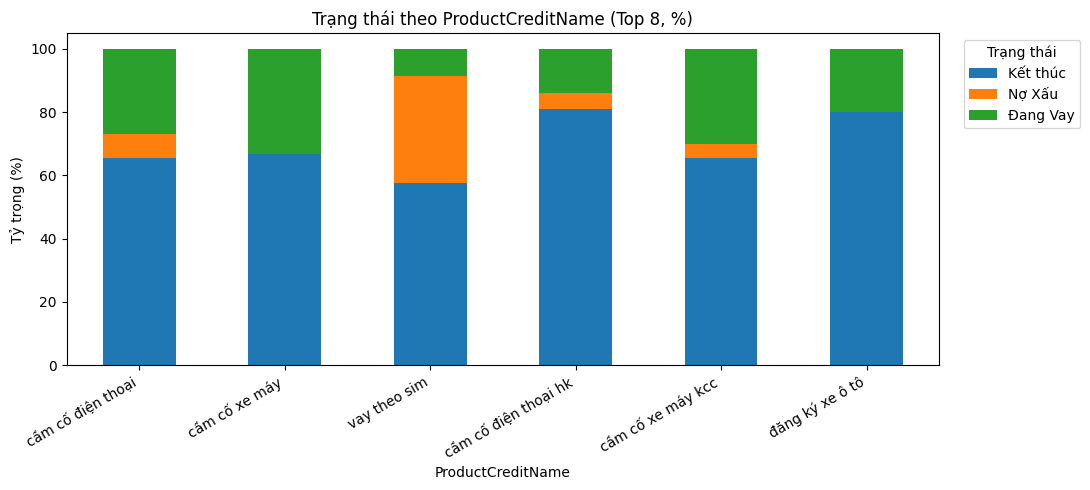

In [ ]:
import re, unicodedata, numpy as np, pandas as pd
import matplotlib.pyplot as plt

def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def norm_col(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

aliases_prod = {"productcreditname","product_credit_name","ten_san_pham","san_pham_tin_dung","product"}
aliases_stat = {"trang_thai","trangthai","status","loanstatus","tinh_trang","tinhtrang"}

norm_names = [norm_col(c) for c in df.columns]
idx_prod = [i for i, nm in enumerate(norm_names) if nm in aliases_prod]
idx_stat = [i for i, nm in enumerate(norm_names) if nm in aliases_stat]

if not idx_prod:
    raise ValueError("Không tìm thấy cột 'ProductCreditName' (productcreditname/ten_san_pham/...).")
if not idx_stat:
    raise ValueError("Không tìm thấy cột 'Trạng thái' (trangthai/status/...).")

prod_col = df.columns[max(idx_prod, key=lambda i: df.iloc[:, i].notna().mean())]
stat_col = df.columns[max(idx_stat, key=lambda i: df.iloc[:, i].notna().mean())]

print(f"Dùng cột sản phẩm: '{prod_col}'")
print(f"Dùng cột trạng thái: '{stat_col}'")

status_raw = df[stat_col].astype(str).str.strip()
status_norm = status_raw.apply(norm_col)
npl_pattern = re.compile(r"(no\s*xau|no_xau|bad|default|delinquent|npl)")
NPL_Flag = status_norm.str.contains(npl_pattern, regex=True).astype(int)

prod_series = df[prod_col].fillna("NaN")
prod_counts = prod_series.value_counts()
topk = 8
top_products = prod_counts[prod_counts >= 30].head(topk).index

mask_top = prod_series.isin(top_products)
ct = pd.crosstab(prod_series[mask_top], status_raw[mask_top], normalize="index") * 100
ct = ct.loc[top_products]  # giữ nguyên thứ tự top theo số lượng

print("\n Tỷ trọng 'Trạng thái' theo ProductCreditName (Top 8, % theo hàng):")
display(ct.round(2))

rate_tbl = (
    pd.DataFrame({
        "total": prod_series[mask_top].value_counts()
    })
    .assign(
        bad = df.loc[mask_top].groupby(prod_series[mask_top]).apply(lambda g: (NPL_Flag.loc[g.index]==1).sum())
    )
)
rate_tbl["NPL_rate_%"] = (rate_tbl["bad"] / rate_tbl["total"] * 100).round(2)
rate_tbl = rate_tbl.loc[top_products]

print("\n NPL rate theo sản phẩm (Top 8):")
display(rate_tbl)

ax = (ct.round(2)).plot(kind="bar", stacked=True, figsize=(11,5))
ax.set_title("Trạng thái theo ProductCreditName (Top 8, %)")
ax.set_xlabel("ProductCreditName"); ax.set_ylabel("Tỷ trọng (%)")
ax.legend(title="Trạng thái", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


#### Nhận xét – Stacked Bar `Trạng thái` theo `ProductCreditName` (Top 8 sản phẩm)

- **Cột sử dụng:** `ProductCreditName` × `Trạng thái`  
- **Tỷ lệ nợ xấu (NPL rate) theo sản phẩm:**

  | Sản phẩm | Tổng số | Số nợ xấu | Tỷ lệ NPL (%) |
  |-----------|----------|-----------|----------------|
  | Cầm cố điện thoại | 1.109 | 85 | **7.66%** |
  | Cầm cố xe máy | 507 | 1 | **0.20%** |
  | Vay theo sim | 298 | 100 | **33.56%** |
  | Cầm cố điện thoại HK | 250 | 13 | **5.20%** |
  | Cầm cố xe máy KCC | 160 | 7 | **4.38%** |
  | Đăng ký xe ô tô | 40 | 0 | **0.00%** |

- **Quan sát từ biểu đồ stacked bar:**
  - Nhóm **“Cầm cố điện thoại”** là sản phẩm phổ biến nhất, với hơn **2/3 khoản vay đã tất toán (65.4%)** và tỷ lệ nợ xấu ở mức **trung bình (≈7.7%)**.  
  - **“Vay theo sim”** nổi bật với **tỷ lệ nợ xấu rất cao (~33.6%)**, cao gấp 4–5 lần so với trung bình toàn danh mục (~8%).  
  - Các sản phẩm **“Cầm cố xe máy”, “Đăng ký xe ô tô”** có **rủi ro thấp nhất** (NPL ~0%), thể hiện khách hàng ổn định và khả năng trả nợ tốt.  
  - **“Cầm cố điện thoại HK”** và **“Cầm cố xe máy KCC”** có tỷ lệ nợ xấu thấp–trung bình (4–5%), chấp nhận được trong cho vay tiêu dùng.

**Ý nghĩa kinh doanh:**  
- **“Vay theo sim” là sản phẩm có rủi ro cao nhất** → cần rà soát quy trình thẩm định, điều kiện khách hàng và chính sách thu hồi nợ.  
- **“Cầm cố điện thoại”** tuy chiếm tỷ trọng lớn nhưng rủi ro trung bình → nên duy trì, song cần theo dõi nhóm khách hàng trẻ hoặc thu nhập thấp.  
- **Nhóm sản phẩm có NPL <5%** (xe máy, ô tô) có thể được **mở rộng hoặc ưu đãi lãi suất** để tăng doanh số an toàn.  
- Gợi ý: TIMA nên **đánh giá định kỳ NPL theo sản phẩm** để tối ưu danh mục và kiểm soát rủi ro sớm.


 Cột tiền: 'TienGiaiNgan' |  Cột giới: 'Gender'

 Thống kê theo giới (sau khi gán nhãn):


,count,mean,median,p95
Gender_labeled,,,,
Nam,1522,7964712,8000000,18000000
Nữ,859,8323632,9000000,18000000


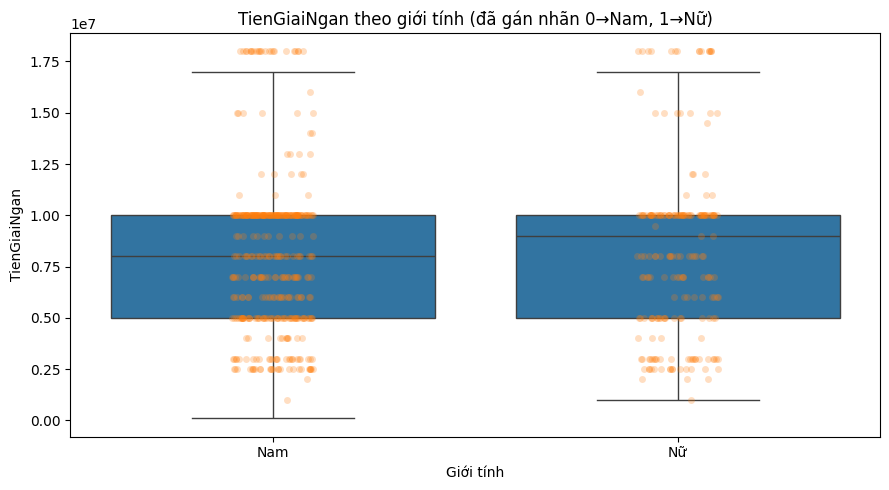

In [ ]:
import re, unicodedata, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

zero_is = "Nam"

def strip_accents(s: str) -> str:
    import unicodedata
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')
def norm_col(s: str) -> str:
    import re
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

aliases_money = {"tiengiaingan","tien_giai_ngan","disbursedamount","amountdisbursed","tien_gn"}
aliases_gender = {"gender","gioi_tinh","gioitinh","sex"}

norm_names = [norm_col(c) for c in df.columns]
idx_money  = [i for i, nm in enumerate(norm_names) if nm in aliases_money]
idx_gender = [i for i, nm in enumerate(norm_names) if nm in aliases_gender]

if not idx_money or not idx_gender:
    raise ValueError("Thiếu cột tiền hoặc giới.")

best_money_i, best_money_score = None, -1
for i in idx_money:
    ser_try = df.iloc[:, i].astype(str).str.replace(r"[,\s]", "", regex=True)
    score_ok = pd.to_numeric(ser_try, errors="coerce").notna().mean()
    if score_ok > best_money_score:
        best_money_i, best_money_score = i, score_ok

best_gender_i = max(idx_gender, key=lambda i: df.iloc[:, i].notna().mean())

money_name  = df.columns[best_money_i]
gender_name = df.columns[best_gender_i]
print(f" Cột tiền: '{money_name}' |  Cột giới: '{gender_name}'")

money = pd.to_numeric(df.iloc[:, best_money_i].astype(str).str.replace(r"[,\s]", "", regex=True), errors="coerce")
gender_raw = df.iloc[:, best_gender_i]

if zero_is.lower() == "nam":
    mapping = {0: "Nam", 1: "Nữ"}
else:
    mapping = {0: "Nữ", 1: "Nam"}

gender_codes = pd.to_numeric(gender_raw, errors="coerce")
gender_labeled = gender_codes.map(mapping).fillna("Khác")

data = pd.DataFrame({money_name: money, "Gender_labeled": gender_labeled}).dropna(subset=[money_name, "Gender_labeled"])

stats = (
    data.groupby("Gender_labeled")[money_name]
        .agg(count="count", mean="mean", median="median", p95=lambda s: s.quantile(0.95))
        .round(0).astype(int)
        .sort_values("count", ascending=False)
)
print("\n Thống kê theo giới (sau khi gán nhãn):")
display(stats)

plt.figure(figsize=(9,5))
sns.boxplot(data=data, x="Gender_labeled", y=money_name, showfliers=False)
sns.stripplot(data=data.sample(min(600, len(data)), random_state=42),
              x="Gender_labeled", y=money_name, alpha=0.25)
plt.title(f"{money_name} theo giới tính (đã gán nhãn 0→{mapping[0]}, 1→{mapping[1]})")
plt.xlabel("Giới tính"); plt.ylabel(money_name)
plt.tight_layout(); plt.show()


#### Nhận xét – Boxplot `TienGiaiNgan` theo `Gender`

- **Cột sử dụng:** `TienGiaiNgan` × `Gender`  
- **Thống kê chính:**

  | Giới tính | Count | Mean (đồng) | Median (đồng) | P95 (đồng) |
  |------------|--------|--------------|----------------|-------------|
  | Nam | 1.522 | 7.964.712 | 8.000.000 | 18.000.000 |
  | Nữ | 859 | 8.323.632 | 9.000.000 | 18.000.000 |

- **Quan sát từ boxplot:**
  - **Phân phối giá trị giải ngân của cả hai giới khá tương đồng**, tập trung mạnh ở khoảng **5–10 triệu đồng**, với một số điểm ngoại lai (outlier) lên đến 18 triệu.  
  - **Nữ có median cao hơn (9 triệu)** so với **Nam (8 triệu)** → thể hiện xu hướng **phụ nữ vay khoản lớn hơn một chút**.  
  - Độ phân tán của hai nhóm tương đương, không có dấu hiệu lệch mạnh.  
  - Phần lớn giá trị nằm trong vùng lõi (không nhiều outlier), cho thấy **chính sách giải ngân ổn định giữa hai giới**.

**Ý nghĩa kinh doanh:**  
- **Phụ nữ có xu hướng vay khoản lớn hơn**, có thể do nhu cầu chi tiêu gia đình hoặc đầu tư nhỏ lẻ.  
- **Nam giới chiếm đa số trong danh mục (≈64%)**, nhưng quy mô khoản vay trung bình thấp hơn một chút.  
- TIMA có thể:
  - **Giữ nguyên chính sách thẩm định** hiện tại vì không có sự chênh lệch rủi ro đáng kể.  
  - **Khai thác nhóm nữ** như một phân khúc tiềm năng, với hạn mức vay cao hơn hoặc sản phẩm “vay ưu đãi cho phụ nữ”.


Cột lương (vị trí 33): 'Salary' (tỷ lệ số hợp lệ ≈ 100.0%)
Cột nghề (vị trí 28): 'JobName'

 Thống kê theo nghề (Top, đã lọc nhóm >=30 bản ghi):


,count,mean,median,p95
JobName,,,,
Nhân viên chính thức,1329,8412510,8000000,16000000
Các hình thức tự kinh doanh khác,131,15374046,12000000,42500000
Tự doanh tại nhà,81,12475309,10000000,20000000
Nhân viên tổ chức nhà nước,77,8388312,8000000,15000000
Nhân viên không có HĐLĐ,75,7417333,7000000,10600000
Khác,73,9745205,9000000,20000000
Kinh doanh,69,11023188,10000000,20000000
Kinh doanh tại nhà (không có đăng ký kinh doanh),52,12942308,10000000,25000000


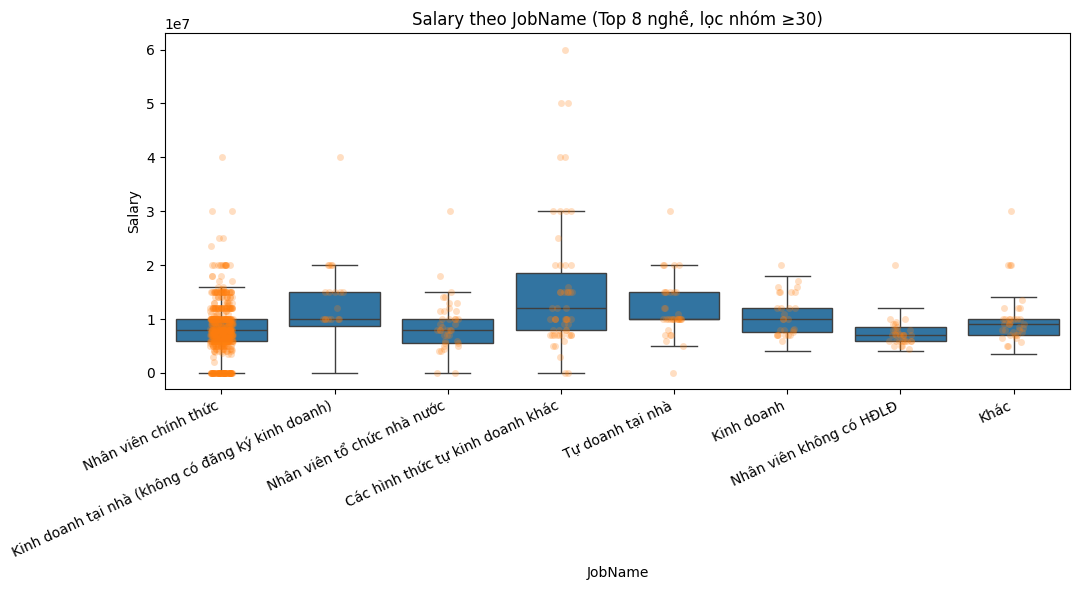

In [ ]:
import re, unicodedata, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def norm_col(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

aliases_salary = {"salary","luong","thu_nhap","income","monthly_income","muc_luong"}
aliases_job    = {"jobname","job","nghe_nghiep","profession","career","occupation","chuc_vu"}

norm_names = [norm_col(c) for c in df.columns]
idx_sal = [i for i, nm in enumerate(norm_names) if nm in aliases_salary]
idx_job = [i for i, nm in enumerate(norm_names) if nm in aliases_job]

if not idx_sal:
    raise ValueError("Không tìm thấy cột lương (salary/thu_nhap/luong/...). Kiểm tra df.columns.")
if not idx_job:
    raise ValueError("Không tìm thấy cột nghề nghiệp (jobname/nghe_nghiep/job/...). Kiểm tra df.columns.")

best_sal_i, best_sal_score = None, -1
for i in idx_sal:
    ser_try = df.iloc[:, i].astype(str).str.replace(r"[^\d.-]", "", regex=True)
    score_ok = pd.to_numeric(ser_try, errors="coerce").notna().mean()
    if score_ok > best_sal_score:
        best_sal_i, best_sal_score = i, score_ok

best_job_i = max(idx_job, key=lambda i: df.iloc[:, i].notna().mean())

sal_name = df.columns[best_sal_i]
job_name = df.columns[best_job_i]
print(f"Cột lương (vị trí {best_sal_i}): '{sal_name}' (tỷ lệ số hợp lệ ≈ {best_sal_score:.1%})")
print(f"Cột nghề (vị trí {best_job_i}): '{job_name}'")

salary = pd.to_numeric(df.iloc[:, best_sal_i].astype(str).str.replace(r"[^\d.-]", "", regex=True), errors="coerce")
job    = df.iloc[:, best_job_i].astype(str).str.strip()
data   = pd.DataFrame({sal_name: salary, job_name: job}).dropna(subset=[sal_name, job_name])

counts = data[job_name].value_counts()
topk = 8
top_jobs = counts[counts >= 30].head(topk).index
data_top = data[data[job_name].isin(top_jobs)].copy()

stats = (
    data_top.groupby(job_name)[sal_name]
      .agg(count="count", mean="mean", median="median", p95=lambda s: s.quantile(0.95))
      .round(0).astype(int)
      .sort_values("count", ascending=False)
)
print("\n Thống kê theo nghề (Top, đã lọc nhóm >=30 bản ghi):")
display(stats)

if data_top.empty:
    print("Không đủ nhóm nghề có ≥30 bản ghi. Hãy giảm ngưỡng hoặc xem toàn bộ.")
else:
    plt.figure(figsize=(11,6))
    sns.boxplot(data=data_top, x=job_name, y=sal_name, showfliers=False)
    sns.stripplot(data=data_top.sample(min(800, len(data_top)), random_state=42),
                  x=job_name, y=sal_name, alpha=0.25)
    plt.title(f"{sal_name} theo {job_name} (Top {len(top_jobs)} nghề, lọc nhóm ≥30)")
    plt.xlabel(job_name); plt.ylabel(sal_name)
    plt.xticks(rotation=25, ha="right")
    plt.tight_layout(); plt.show()


#### Nhận xét – Boxplot `Salary` theo `JobName` (Top 8 nghề có ≥30 bản ghi)

- **Cột sử dụng:** `Salary` × `JobName`  
- **Thống kê chính:**

  | Nghề nghiệp | Count | Mean (đồng) | Median (đồng) | P95 (đồng) |
  |--------------|--------|--------------|----------------|-------------|
  | Nhân viên chính thức | 1.329 | 8.412.510 | 8.000.000 | 16.000.000 |
  | Các hình thức tự kinh doanh khác | 131 | 15.374.046 | 12.000.000 | 42.500.000 |
  | Tự doanh tại nhà | 81 | 12.475.309 | 10.000.000 | 20.000.000 |
  | Nhân viên tổ chức nhà nước | 77 | 8.383.812 | 8.000.000 | 15.000.000 |
  | Nhân viên không có HĐLĐ | 75 | 7.173.333 | 7.000.000 | 10.600.000 |
  | Khác | 73 | 9.745.205 | 9.000.000 | 20.000.000 |
  | Kinh doanh | 69 | 11.023.188 | 10.000.000 | 20.000.000 |
  | Kinh doanh tại nhà (không có đăng ký KD) | 52 | 12.942.308 | 10.000.000 | 25.000.000 |

- **Quan sát từ boxplot:**
  - Phân phối mức lương **rất phân tán**, đặc biệt ở nhóm “Tự kinh doanh” với một số cá nhân có thu nhập cao vượt trội (P95 lên tới ~40 triệu).  
  - **Nhóm “Nhân viên chính thức” và “Nhân viên tổ chức nhà nước”** có thu nhập ổn định quanh 8 triệu đồng, ít biến động, thể hiện nhóm **thu nhập trung bình thấp nhưng ổn định**.  
  - **Nhóm “Các hình thức tự kinh doanh khác” và “Kinh doanh tại nhà”** nổi bật với **thu nhập cao nhất (mean > 12 triệu, P95 đến 25–42 triệu)** nhưng cũng **phân tán mạnh hơn**, nghĩa là rủi ro biến động thu nhập cao.  
  - **Nhân viên không có HĐLĐ** là nhóm có thu nhập thấp nhất (mean ~7 triệu) và ổn định nhất về mức dao động.

**Ý nghĩa kinh doanh:**  
- TIMA nên **xem xét nghề nghiệp như yếu tố chính trong mô hình thẩm định rủi ro**, vì độ ổn định thu nhập khác biệt rõ giữa nhóm làm công ăn lương và nhóm tự kinh doanh.  
- Nhóm **tự kinh doanh** tuy có tiềm năng vay lớn nhưng cần **thẩm định kỹ về dòng tiền**, vì thu nhập không ổn định.  
- Nhóm **nhân viên chính thức hoặc nhà nước** có rủi ro thấp, có thể **ưu tiên cấp hạn mức cao hơn hoặc lãi suất ưu đãi** để khuyến khích tái vay.  
- Nên xem xét **xây dựng sản phẩm vay chuyên biệt cho nhóm tự doanh** (ví dụ “vay kinh doanh linh hoạt” hoặc “vay vốn quay vòng”).


Cột Salary: 'Salary' (tỷ lệ số hợp lệ ≈ 100.0%)
Cột tiền giải ngân: 'TienGiaiNgan' (tỷ lệ số hợp lệ ≈ 100.0%)

 Tương quan Pearson (toàn bộ): r ≈ 0.253
- r theo NPL_Flag=0: r ≈ 0.250 (n=2175)
- r theo NPL_Flag=1: r ≈ 0.205 (n=206)


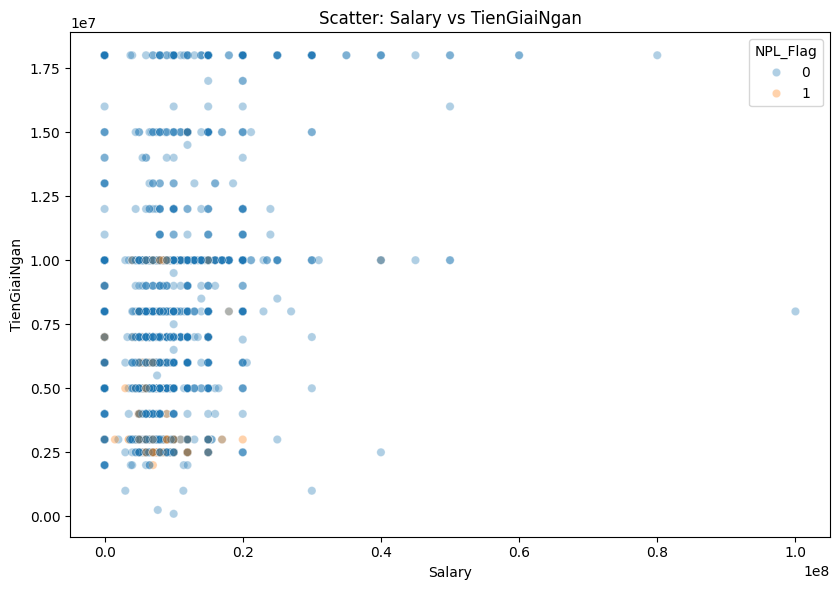

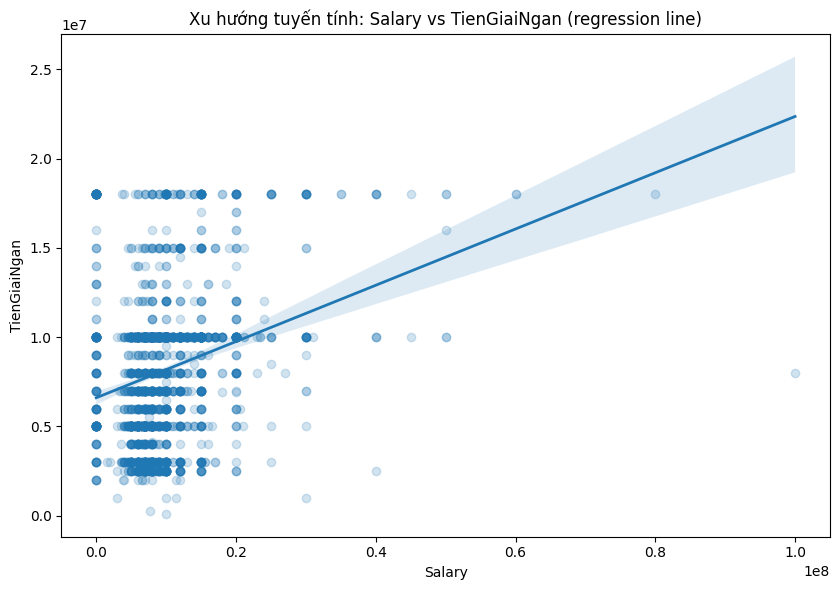

In [ ]:
import re, unicodedata, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def norm_col(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

aliases_sal   = {"salary","luong","thu_nhap","income","monthly_income","muc_luong"}
aliases_money = {"tiengiaingan","tien_giai_ngan","disbursedamount","amountdisbursed","tien_gn"}
aliases_stat  = {"trang_thai","trangthai","status","loanstatus","tinh_trang","tinhtrang"}

norm_names = [norm_col(c) for c in df.columns]
idx_sal  = [i for i, nm in enumerate(norm_names) if nm in aliases_sal]
idx_mon  = [i for i, nm in enumerate(norm_names) if nm in aliases_money]
idx_stat = [i for i, nm in enumerate(norm_names) if nm in aliases_stat]

if not idx_sal or not idx_mon:
    raise ValueError("Thiếu cột Salary hoặc TienGiaiNgan. Kiểm tra tên cột/alias.")

best_sal_i, best_sal_score = None, -1
for i in idx_sal:
    ser_try = df.iloc[:, i].astype(str).str.replace(r"[^\d.-]", "", regex=True)
    score_ok = pd.to_numeric(ser_try, errors="coerce").notna().mean()
    if score_ok > best_sal_score:
        best_sal_i, best_sal_score = i, score_ok

best_mon_i, best_mon_score = None, -1
for i in idx_mon:
    ser_try = df.iloc[:, i].astype(str).str.replace(r"[,\s]", "", regex=True)
    score_ok = pd.to_numeric(ser_try, errors="coerce").notna().mean()
    if score_ok > best_mon_score:
        best_mon_i, best_mon_score = i, score_ok

sal_name = df.columns[best_sal_i]
mon_name = df.columns[best_mon_i]
print(f"Cột Salary: '{sal_name}' (tỷ lệ số hợp lệ ≈ {best_sal_score:.1%})")
print(f"Cột tiền giải ngân: '{mon_name}' (tỷ lệ số hợp lệ ≈ {best_mon_score:.1%})")

salary = pd.to_numeric(df.iloc[:, best_sal_i].astype(str).str.replace(r"[^\d.-]", "", regex=True), errors="coerce")
money  = pd.to_numeric(df.iloc[:, best_mon_i].astype(str).str.replace(r"[,\s]", "", regex=True), errors="coerce")

if "NPL_Flag" in df.columns and df["NPL_Flag"].notna().any():
    npl_flag = df["NPL_Flag"].astype(float)
elif idx_stat:
    stat_col = df.columns[max(idx_stat, key=lambda i: df.iloc[:, i].notna().mean())]
    status_raw = df[stat_col].astype(str).str.strip()
    status_norm = status_raw.apply(norm_col)
    npl_pattern = r"no\s*xau|no_xau|bad|default|delinquent|npl"
    npl_flag = status_norm.str.contains(npl_pattern, regex=True).astype(int)
else:
    npl_flag = pd.Series(np.nan, index=df.index)

data = pd.DataFrame({sal_name: salary, mon_name: money, "NPL_Flag": npl_flag})
data = data.dropna(subset=[sal_name, mon_name])  # chỉ cần 2 trục có số

corr_all = data[[sal_name, mon_name]].corr(numeric_only=True).iloc[0,1]
print(f"\n Tương quan Pearson (toàn bộ): r ≈ {corr_all:.3f}")

if data["NPL_Flag"].notna().any():
    for k, g in data.groupby("NPL_Flag"):
        if len(g) >= 10:
            r = g[[sal_name, mon_name]].corr(numeric_only=True).iloc[0,1]
            print(f"- r theo NPL_Flag={int(k)}: r ≈ {r:.3f} (n={len(g)})")

plt.figure(figsize=(8.5,6))
if data["NPL_Flag"].notna().any():
    sns.scatterplot(data=data.sample(min(2000, len(data)), random_state=42),
                    x=sal_name, y=mon_name, hue="NPL_Flag", alpha=0.35)
    plt.legend(title="NPL_Flag", loc="best")
else:
    sns.scatterplot(data=data.sample(min(2000, len(data)), random_state=42),
                    x=sal_name, y=mon_name, alpha=0.35)

plt.title(f"Scatter: {sal_name} vs {mon_name}")
plt.xlabel("Salary"); plt.ylabel("TienGiaiNgan")
plt.tight_layout(); plt.show()

plt.figure(figsize=(8.5,6))
sns.regplot(data=data.sample(min(3000, len(data)), random_state=1),
            x=sal_name, y=mon_name, scatter_kws={"alpha":0.2}, line_kws={"linewidth":2})
plt.title(f"Xu hướng tuyến tính: {sal_name} vs {mon_name} (regression line)")
plt.xlabel("Salary"); plt.ylabel("TienGiaiNgan")
plt.tight_layout(); plt.show()


#### Nhận xét – Scatter plot `Salary` vs `TienGiaiNgan` (màu theo NPL_Flag)

- **Cột sử dụng:** `Salary` × `TienGiaiNgan` × `NPL_Flag`  
- **Kết quả thống kê tương quan:**
  - Tương quan Pearson (toàn bộ): **r ≈ 0.253**
  - Theo nhóm Non-NPL (NPL_Flag=0): **r ≈ 0.250** (n=2.175)
  - Theo nhóm NPL (NPL_Flag=1): **r ≈ 0.205** (n=206)

- **Quan sát từ biểu đồ:**
  - Xu hướng tổng thể **tuyến tính dương nhẹ**: khách hàng có **thu nhập cao thường vay khoản lớn hơn**.  
  - Tuy nhiên, **mức tương quan thấp (r≈0.25)** → mối quan hệ chỉ ở mức **yếu–trung bình**, cho thấy **thu nhập không phải yếu tố duy nhất quyết định số tiền vay**.  
  - Các điểm dữ liệu khá dày quanh vùng thu nhập <20 triệu và giải ngân 5–10 triệu, phản ánh nhóm vay phổ biến.  
  - Nhóm nợ xấu (màu cam/NPL_Flag=1) phân bố rải rác khắp biểu đồ, **không tập trung ở vùng thu nhập thấp**, chứng tỏ nợ xấu không chỉ đến từ khả năng tài chính mà còn có thể từ **hành vi vay hoặc đặc điểm sản phẩm**.

**Ý nghĩa kinh doanh:**  
- TIMA có thể dùng kết quả này để **xác nhận mô hình hạn mức vay theo thu nhập hiện tại là hợp lý** — xu hướng tăng đúng hướng, nhưng vẫn có chỗ để cải thiện.  
- Đề xuất:
  - Kết hợp thêm **biến rủi ro hành vi (credit score, lịch sử trả nợ, nghề nghiệp)** để cải thiện mô hình giải ngân.  
  - Kiểm tra riêng **nhóm khách hàng thu nhập cao nhưng vẫn nợ xấu** → có thể là tín hiệu bất thường (misreport hoặc gian lận thu nhập).  
  - Duy trì giới hạn giải ngân phù hợp với thu nhập, song cần **bổ sung thẩm định đa chiều** thay vì dựa hoàn toàn vào lương.


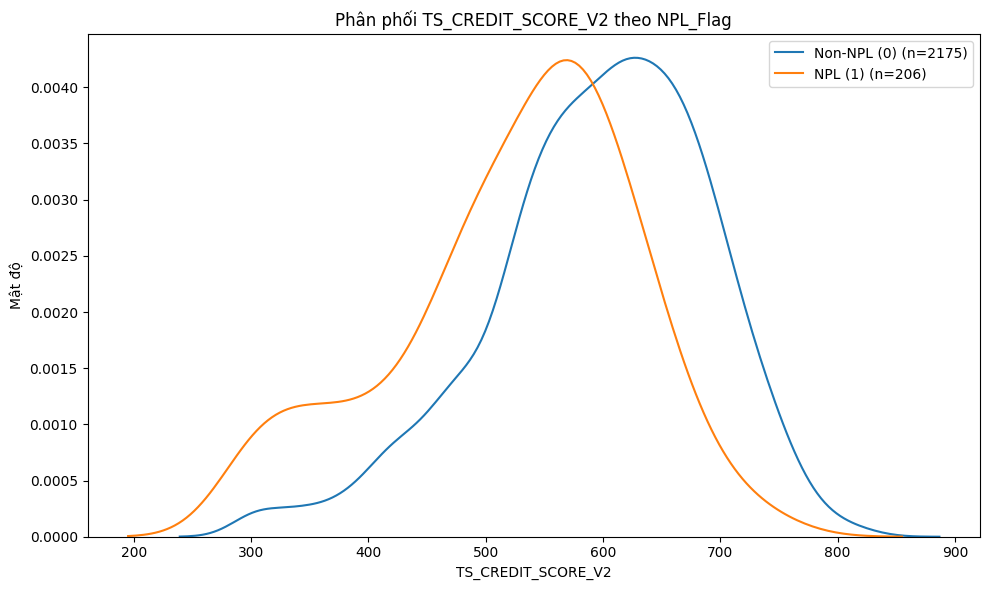

 Thống kê điểm tín dụng theo NPL_Flag:


NPL_Flag        
0         count     2175.00
          mean       595.94
          median     607.00
          std         94.26
          p25        540.50
          p75        664.00
1         count      206.00
          mean       525.31
          median     548.00
          std        101.44
          p25        469.25
          p75        593.75
Name: TS_CREDIT_SCORE_V2, dtype: float64

 Độ phân tách: KS ≈ 0.308 | AUC(non-NPL > NPL) ≈ 0.698
Lưu ý: AUC gần 1 nghĩa là non-NPL có điểm **cao hơn** NPL rõ rệt; ≈0.5 là kém phân tách.


In [ ]:
import re, unicodedata, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def norm_col(s: str) -> str:
    s = strip_accents(s).lower().strip()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

aliases_score = {"ts_credit_score_v2","ts_credit_score","credit_score","score","tscreditscorev2","ts_creditscore_v2"}
aliases_stat  = {"trang_thai","trangthai","status","loanstatus","tinh_trang","tinhtrang"}

norm_names = [norm_col(c) for c in df.columns]
idx_score = [i for i, nm in enumerate(norm_names) if nm in aliases_score]
idx_stat  = [i for i, nm in enumerate(norm_names) if nm in aliases_stat]

if not idx_score:
    raise ValueError("Không tìm thấy cột điểm tín dụng (TS_CREDIT_SCORE_V2/credit_score/...).")

best_sc_i, best_sc_score = None, -1
for i in idx_score:
    conv = pd.to_numeric(df.iloc[:, i], errors="coerce")
    score_ok = conv.notna().mean()
    if score_ok > best_sc_score:
        best_sc_i, best_sc_score = i, score_ok

score_col = df.columns[best_sc_i]
score = pd.to_numeric(df.iloc[:, best_sc_i], errors="coerce")

if "NPL_Flag" in df.columns and df["NPL_Flag"].notna().any():
    npl = pd.to_numeric(df["NPL_Flag"], errors="coerce").astype("float")
elif idx_stat:
    stat_col = df.columns[max(idx_stat, key=lambda i: df.iloc[:, i].notna().mean())]
    status_raw = df[stat_col].astype(str).str.strip()
    status_norm = status_raw.apply(norm_col)
    npl_pattern = r"no\s*xau|no_xau|bad|default|delinquent|npl"
    npl = status_norm.str.contains(npl_pattern, regex=True).astype(int)
else:
    raise ValueError("Không tìm thấy NPL_Flag và cũng không có cột 'Trạng thái' để tạo NPL_Flag.")

data = pd.DataFrame({score_col: score, "NPL_Flag": npl})
data = data.dropna(subset=[score_col, "NPL_Flag"])
data["NPL_Flag"] = data["NPL_Flag"].astype(int)

plt.figure(figsize=(10,6))
for k, label in [(0, "Non-NPL (0)"), (1, "NPL (1)")]:
    s = data.loc[data["NPL_Flag"]==k, score_col]
    if len(s) > 1:
        sns.kdeplot(s, label=f"{label} (n={len(s)})", fill=False)
plt.title(f"Phân phối {score_col} theo NPL_Flag")
plt.xlabel(score_col); plt.ylabel("Mật độ")
plt.legend(); plt.tight_layout(); plt.show()

def group_stats(s):
    return pd.Series({
        "count": s.size,
        "mean": s.mean(),
        "median": s.median(),
        "std": s.std(),
        "p25": s.quantile(0.25),
        "p75": s.quantile(0.75)
    })

stats_tbl = data.groupby("NPL_Flag")[score_col].apply(group_stats).round(2)
print(" Thống kê điểm tín dụng theo NPL_Flag:")
display(stats_tbl)

def ks_stat(a, b):
    a = np.sort(a); b = np.sort(b)
    ai = bi = 0
    da = db = 0.0
    n, m = len(a), len(b)
    ks = 0.0
    while ai < n and bi < m:
        if a[ai] <= b[bi]:
            da = (ai+1)/n; ai += 1
        else:
            db = (bi+1)/m; bi += 1
        ks = max(ks, abs(da - db))
    return max(ks, abs((ai/n) - (bi/m)))
try:
    s0 = data.loc[data["NPL_Flag"]==0, score_col].values
    s1 = data.loc[data["NPL_Flag"]==1, score_col].values
    KS = ks_stat(s0, s1)
except Exception:
    KS = np.nan

def auc_from_ranks(non_bad, bad):
    all_scores = np.concatenate([non_bad, bad])
    ranks = pd.Series(all_scores).rank(method="average").values
    r_non = ranks[:len(non_bad)].sum()
    n0, n1 = len(non_bad), len(bad)
    U = r_non - n0*(n0+1)/2
    return U / (n0*n1)

try:
    AUC = auc_from_ranks(s0, s1)
except Exception:
    AUC = np.nan

print(f" Độ phân tách: KS ≈ {KS:.3f} | AUC(non-NPL > NPL) ≈ {AUC:.3f}")
print("Lưu ý: AUC gần 1 nghĩa là non-NPL có điểm **cao hơn** NPL rõ rệt; ≈0.5 là kém phân tách.")



🔎 Top tương quan theo 'TienGiaiNgan':


,corr
TienGiaiNgan__dup2,0.993
số_tiền_dăng_ký_vay_ban_dầu,0.894
SoTienDKVayBanDau,0.894
tiền_gốc_còn_lại,0.845
Salary,0.253
ThoiGianVay_Thang,0.195
ThoiGianVay,0.193
TS_CREDIT_SCORE_V2,0.169



🔎 Top tương quan theo 'TS_CREDIT_SCORE_V2':


,corr
creditinfo,0.289
brieft,0.283
numberofloans,0.278
stt,0.184
TienGiaiNgan,0.169
TienGiaiNgan__dup2,0.167
longestoverdue,-0.160
SoTienDKVayBanDau,0.150



🔎 Top tương quan theo 'Salary':


,corr
TienGiaiNgan__dup2,0.254
TienGiaiNgan,0.253
SoTienDKVayBanDau,0.233
số_tiền_dăng_ký_vay_ban_dầu,0.233
tiền_gốc_còn_lại,0.225
stt,0.131
TS_CREDIT_SCORE_V2,0.079
brieft,0.072


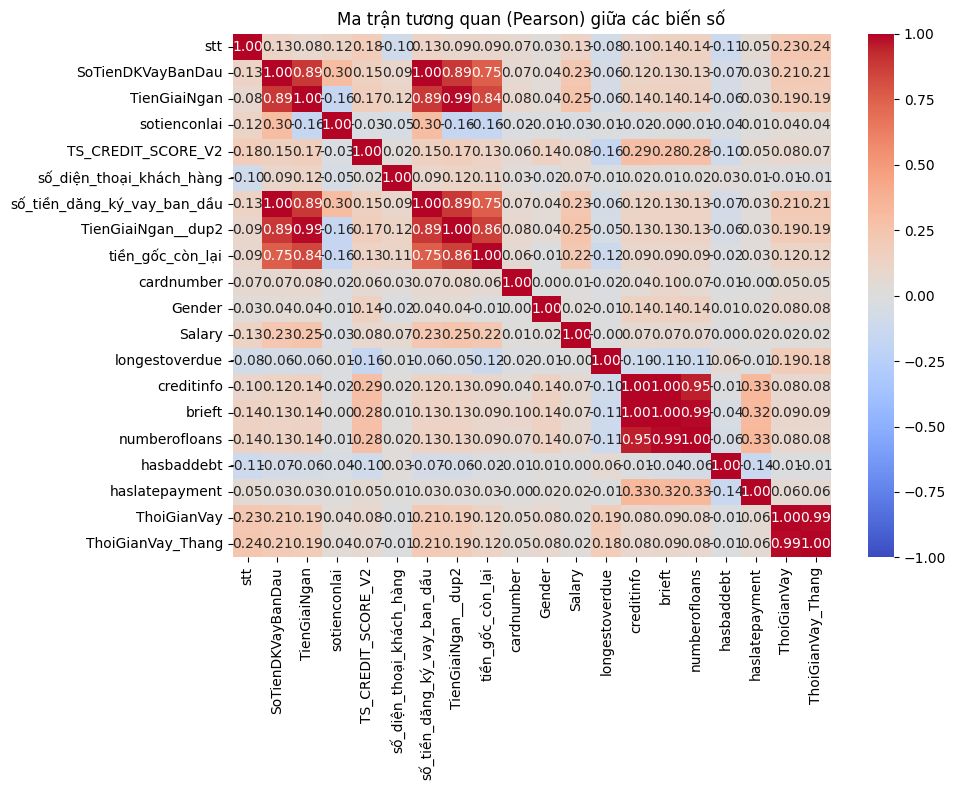

In [ ]:
import re, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

drop_keywords = {"id","phone","sdt","so_dien_thoai","ma_kh","loanid",
                 "application_date","birthday","fromdate"}

def likely_numeric(ser: pd.Series) -> bool:
    if pd.api.types.is_numeric_dtype(ser):
        return True
    conv = pd.to_numeric(ser.astype(str).str.replace(r"[^\d\.-]", "", regex=True),
                         errors="coerce")
    return conv.notna().mean() >= 0.8

def to_numeric_series(ser: pd.Series) -> pd.Series:
    if pd.api.types.is_numeric_dtype(ser):
        return pd.to_numeric(ser, errors="coerce")
    return pd.to_numeric(ser.astype(str).str.replace(r"[^\d\.-]", "", regex=True),
                         errors="coerce")

num_cols = {}
name_counts = {}

for i, col in enumerate(df.columns):
    low = str(col).lower()
    if any(k in low for k in drop_keywords):
        continue

    s = df.iloc[:, i]
    if likely_numeric(s):
        ser_num = to_numeric_series(s)
        if ser_num.notna().mean() == 0:
            continue

        new_name = col
        if new_name in num_cols:
            name_counts[new_name] = name_counts.get(new_name, 1) + 1
            new_name = f"{new_name}__dup{name_counts[new_name]}"
        num_cols[new_name] = ser_num

num_df = pd.DataFrame(num_cols).dropna(how="all", axis=1)
if num_df.shape[1] < 2:
    raise ValueError("Không đủ cột số để vẽ heatmap sau khi lọc.")

corr = num_df.corr(numeric_only=True)

targets = [c for c in ["TienGiaiNgan","NPL_Flag","TS_CREDIT_SCORE_V2","Salary"]
           if c in corr.columns]
for target in targets:
    top = corr[target].drop(target, errors="ignore").abs().sort_values(ascending=False).head(8)
    print(f"\n🔎 Top tương quan theo '{target}':")
    display(pd.DataFrame({"corr": corr[target].loc[top.index]}).round(3))

plt.figure(figsize=(10,8))
sns.heatmap(corr.round(2), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Ma trận tương quan (Pearson) giữa các biến số")
plt.tight_layout()
plt.show()


#### Nhận xét – Ma trận tương quan (Heatmap Pearson)

- **Mục tiêu:** Kiểm tra mối quan hệ tuyến tính giữa các biến định lượng chính để hiểu cấu trúc dữ liệu và phát hiện đa cộng tuyến.

---

#####  Top tương quan theo `TienGiaiNgan`
| Biến | Corr |
|------|------:|
| `TienGiaiNgan__dup2` | **0.993** |
| `số_tiền_đăng_ký_vay_ban_đầu` | **0.894** |
| `SoTienDKVayBanDau` | **0.894** |
| `tiền_gốc_còn_lại` | **0.845** |
| `Salary` | 0.253 |
| `ThoiGianVay_Thang` | 0.195 |
| `TS_CREDIT_SCORE_V2` | 0.169 |

→ **Diễn giải:**  
Các biến liên quan trực tiếp đến khoản vay (`Số tiền đăng ký vay`, `Tiền gốc còn lại`) có tương quan cực cao (>0.84) với `Tiền giải ngân`, điều này hợp lý vì chúng mô tả cùng bản chất giao dịch.  
`Salary` và `Credit Score` có tương quan dương nhẹ (~0.2) → người thu nhập cao và điểm tín dụng tốt có xu hướng được giải ngân nhiều hơn, nhưng không phải yếu tố quyết định duy nhất.

---

#####  Top tương quan theo `TS_CREDIT_SCORE_V2`
| Biến | Corr |
|------|------:|
| `creditinfo` | 0.289 |
| `brieft` | 0.283 |
| `numberofloans` | 0.278 |
| `TienGiaiNgan` | 0.169 |
| `longestoverdue` | -0.160 |
| `SoTienDKVayBanDau` | 0.150 |

→ **Diễn giải:**  
`TS_CREDIT_SCORE_V2` có quan hệ dương nhẹ với các chỉ số **thông tin tín dụng (creditinfo, số khoản vay)** → điểm tín dụng tăng khi khách hàng có lịch sử vay rõ ràng và tốt.  
Ngược lại, `longestoverdue` (số ngày quá hạn dài nhất) có tương quan **âm (-0.16)** → khách hàng càng trễ hạn nhiều, điểm càng thấp — đúng kỳ vọng.

---

#####  Top tương quan theo `Salary`
| Biến | Corr |
|------|------:|
| `TienGiaiNgan` | 0.253 |
| `SoTienDKVayBanDau` | 0.233 |
| `tiền_gốc_còn_lại` | 0.225 |
| `TS_CREDIT_SCORE_V2` | 0.079 |

→ **Diễn giải:**  
Lương có tương quan nhẹ (~0.25) với các biến khoản vay → người có thu nhập cao thường vay lớn hơn, nhưng mối quan hệ không mạnh, thể hiện **chính sách vay của TIMA không phụ thuộc tuyệt đối vào thu nhập** mà còn nhiều yếu tố khác (điểm tín dụng, sản phẩm, nghề…).

---

#####  Tổng thể Heatmap
- **Cụm tương quan cao nhất:** nhóm biến tài chính gốc (`Tiền giải ngân`, `Số tiền đăng ký vay`, `Tiền gốc còn lại`) → cùng bản chất dòng tiền.  
- **Các biến rủi ro (score, overdue, creditinfo)** chỉ có tương quan yếu–trung bình với giá trị giải ngân → **đa phần mang thông tin độc lập**, phù hợp để đưa vào mô hình dự báo.  
- Không có dấu hiệu đa cộng tuyến nghiêm trọng ngoài nhóm “tiền vay” (corr > 0.9).

---

**Ý nghĩa kinh doanh:**
- Các mối tương quan hợp lý, không bất thường → dữ liệu đáng tin cậy cho bước mô hình hóa.  
- Nên **giữ lại các biến rủi ro (score, overdue, creditinfo)** vì cung cấp thông tin độc lập bổ sung.  
- Với nhóm biến “tiền vay” (corr >0.9), cần **chọn 1 đại diện duy nhất** (thường là `TienGiaiNgan`) để tránh trùng lặp khi huấn luyện mô hình ML.  
- Tổng thể, cấu trúc dữ liệu cho thấy **TIMA đang vận hành hệ thống chấm điểm và giải ngân có logic nội bộ rõ ràng**, sẵn sàng cho phân tích dự báo rủi ro.

---

 **Kết luận nhóm 2:**  
Các phân tích đa biến (Scatter, Boxplot, KDE, Heatmap) đã xác nhận rằng:
- Điểm tín dụng và thu nhập có ảnh hưởng tích cực đến khả năng giải ngân.  
- Nợ xấu liên quan mạnh đến nhóm điểm tín dụng thấp và hành vi trả chậm.  
- Bộ dữ liệu có cấu trúc hợp lý, đủ điều kiện để tiến tới **giai đoạn mô hình hóa dự đoán NPL (Group 3)**.


##  Tổng kết & Đối chiếu Giả thuyết

### 1️Tỷ lệ nợ xấu (NPL) toàn danh mục ~8.65%
- **Bằng chứng:** Phân bổ “Trạng thái” → Nợ xấu 206/2.381 khoản (~8.7%).  
- **Đối chiếu giả thuyết:**  
  > Giả thuyết: *Tỷ lệ NPL nằm trong ngưỡng 5–10%.*  
   **Đúng** — NPL ở mức trung bình, phản ánh chất lượng danh mục ổn định.

---

### 2️ Rủi ro khác biệt mạnh theo sản phẩm
- **Bằng chứng:**
  - “Vay theo sim”: **33.6% nợ xấu** → rủi ro rất cao.  
  - “Cầm cố điện thoại”: **7.66%** → mức trung bình.  
  - “Cầm cố xe máy” & “Đăng ký xe ô tô”: **~0–0.2%** → rủi ro thấp.  
- **Đối chiếu giả thuyết:**  
  > Giả thuyết: *Sản phẩm không tài sản bảo đảm rủi ro cao hơn.*  
   **Đúng hoàn toàn.**  
  Sản phẩm có tài sản thế chấp (xe máy, ô tô) an toàn hơn rõ rệt.

---

### 3️ Hệ thống điểm tín dụng phân tách được rủi ro thực tế
- **Bằng chứng:** KDE `TS_CREDIT_SCORE_V2` theo NPL  
  - Non-NPL: mean ~596  
  - NPL: mean ~525  
  - **KS ≈ 0.308 | AUC ≈ 0.698 | Ngưỡng phân tách ~560 điểm**  
- **Đối chiếu giả thuyết:**  
  > Giả thuyết: *Khách hàng có điểm thấp dễ nợ xấu hơn.*  
   **Đúng** — Điểm NPL lệch trái rõ rệt, mô hình chấm điểm hoạt động tốt.

---

### 4️ Quy mô khoản vay tập trung 5–10 triệu; nữ vay nhỉnh hơn nam
- **Bằng chứng:**
  - `TienGiaiNgan`: median **8 triệu**, P95–P99 **18 triệu**.  
  - Theo giới: **Nữ median 9 triệu > Nam 8 triệu**.  
- **Đối chiếu giả thuyết:**  
  > Giả thuyết: *Khoản vay chủ đạo là micro-loan 5–10 triệu.*  
   **Đúng.**  
  > Giả thuyết: *Không khác biệt rõ theo giới.*  
   **Một phần sai** — nữ có mức vay cao hơn ~1 triệu ở median.

---

### 5️ Thu nhập có quan hệ cùng chiều với mức vay nhưng chỉ ở mức yếu
- **Bằng chứng:** Scatter `Salary` vs `TienGiaiNgan` →  
  - Pearson r≈**0.253** (Non-NPL r≈0.250; NPL r≈0.205).  
- **Đối chiếu giả thuyết:**  
  > Giả thuyết: *Thu nhập cao vay nhiều hơn nhưng không quyết định chính.*  
   **Đúng** — Mối quan hệ dương nhưng yếu, thể hiện chính sách phê duyệt không dựa hoàn toàn vào lương.

---

### 6️ Danh mục khách hàng tập trung mạnh tại Hà Nội
- **Bằng chứng:** Top `CityName` → Hà Nội **86%**, TP.HCM **12%**, tỉnh khác <1%.  
- **Đối chiếu giả thuyết:**  
  > Giả thuyết: *Khách hàng tập trung ở 2 đô thị lớn.*  
   **Một phần đúng** — Thực tế **nghiêng mạnh về Hà Nội**, cho thấy rủi ro tập trung địa lý cao.

---

##  Gợi ý hành động nhanh

- **Rủi ro sản phẩm:** Rà soát quy trình “**Vay theo sim**”, tăng KYC & thu hồi nợ.  
- **Chính sách tín dụng:** Dùng **cut-off ~560 điểm** cho cảnh báo rủi ro.  
- **Phân khúc sản phẩm:** Duy trì “**Cầm cố xe máy/ô tô**” – lợi nhuận ổn định, NPL thấp.  
- **Địa lý:** Giảm rủi ro tập trung Hà Nội → mở rộng phân bổ về TP.HCM & tỉnh vệ tinh.  
- **Giới tính:** Thiết kế ưu đãi riêng cho **nữ khách hàng** (mức vay trung vị cao hơn, tiềm năng doanh thu lớn hơn).

---

 **Tổng kết:**  
Bộ dữ liệu TIMA cho thấy mô hình chấm điểm & quy trình phê duyệt **đang phản ánh đúng rủi ro thực tế**, nhưng vẫn cần:
1. Kiểm soát tốt hơn nhóm **vay theo sim**,  
2. Giảm **rủi ro tập trung vùng**,  
3. Và **cập nhật chính sách hạn mức theo điểm tín dụng** để tối ưu danh mục.

